In [2]:
import pandas as pd
import numpy as np

In [1]:
df = pd.read_excel('./tourist_review_emotion_classification.xlsx', engine='openpyxl')

NameError: name 'pd' is not defined

In [5]:
df.columns

Index(['Category', 'text', 'title', 'rating', 'travelDate', 'publishedDate',
       'placeInfo/addressObj/city', 'placeInfo/address',
       'placeInfo/locationString', 'placeInfo/addressObj/postalcode',
       'placeInfo/name', 'placeInfo/numberOfReviews', 'placeInfo/rating',
       'placeInfo/ratingHistogram/count1', 'placeInfo/ratingHistogram/count2',
       'placeInfo/ratingHistogram/count3', 'placeInfo/ratingHistogram/count4',
       'placeInfo/ratingHistogram/count5', 'user/userLocation/name',
       'user/userLocation/shortName', 'user/contributions/totalContributions',
       'user/contributions/helpfulVotes', 'Month', 'Region', 'VADER',
       'Cardiff', 'Hartmann', 'GoEmotions', 'XLM-R', 'ABSA', 'Flan-T5',
       'FinalDecision'],
      dtype='object')

In [6]:
# Examine the Cardiff column structure
print("Cardiff column sample values:")
print(df['Cardiff'].head())
print("\nData type:", df['Cardiff'].dtype)
print("\nFirst value type:", type(df['Cardiff'].iloc[0]))

Cardiff column sample values:
0    ('positive', 0.978)
1    ('positive', 0.988)
2    ('positive', 0.981)
3    ('positive', 0.512)
4    ('positive', 0.975)
Name: Cardiff, dtype: object

Data type: object

First value type: <class 'str'>


In [7]:
# Convert Cardiff string tuples to actual tuples and separate into two columns
import ast

# Convert string representation of tuples to actual tuples
df['Cardiff_tuple'] = df['Cardiff'].apply(ast.literal_eval)

# Extract the emotion label and score into separate columns
df['Cardiff'] = df['Cardiff_tuple'].apply(lambda x: x[0])  # The emotion string
df['Cardiff_score'] = df['Cardiff_tuple'].apply(lambda x: x[1])  # The confidence score

# Drop the temporary column
df = df.drop('Cardiff_tuple', axis=1)

# Verify the changes
print("Cardiff column after separation:")
print("Cardiff (emotion):", df['Cardiff'].head())
print("\nCardiff_score (confidence):", df['Cardiff_score'].head())
print("\nData types:")
print("Cardiff:", df['Cardiff'].dtype)
print("Cardiff_score:", df['Cardiff_score'].dtype)

Cardiff column after separation:
Cardiff (emotion): 0    positive
1    positive
2    positive
3    positive
4    positive
Name: Cardiff, dtype: object

Cardiff_score (confidence): 0    0.978
1    0.988
2    0.981
3    0.512
4    0.975
Name: Cardiff_score, dtype: float64

Data types:
Cardiff: object
Cardiff_score: float64


In [8]:
# Check the updated dataframe structure
print("Updated columns around Cardiff:")
cardiff_idx = df.columns.get_loc('Cardiff')
print(df.columns[cardiff_idx-2:cardiff_idx+3].tolist())

print(f"\nDataframe shape: {df.shape}")
print(f"Cardiff unique values: {df['Cardiff'].unique()}")
print(f"Cardiff_score range: {df['Cardiff_score'].min():.3f} to {df['Cardiff_score'].max():.3f}")

Updated columns around Cardiff:
['Region', 'VADER', 'Cardiff', 'Hartmann', 'GoEmotions']

Dataframe shape: (7786, 33)
Cardiff unique values: ['positive' 'negative' 'neutral']
Cardiff_score range: 0.342 to 0.992


In [9]:
df.columns

Index(['Category', 'text', 'title', 'rating', 'travelDate', 'publishedDate',
       'placeInfo/addressObj/city', 'placeInfo/address',
       'placeInfo/locationString', 'placeInfo/addressObj/postalcode',
       'placeInfo/name', 'placeInfo/numberOfReviews', 'placeInfo/rating',
       'placeInfo/ratingHistogram/count1', 'placeInfo/ratingHistogram/count2',
       'placeInfo/ratingHistogram/count3', 'placeInfo/ratingHistogram/count4',
       'placeInfo/ratingHistogram/count5', 'user/userLocation/name',
       'user/userLocation/shortName', 'user/contributions/totalContributions',
       'user/contributions/helpfulVotes', 'Month', 'Region', 'VADER',
       'Cardiff', 'Hartmann', 'GoEmotions', 'XLM-R', 'ABSA', 'Flan-T5',
       'FinalDecision', 'Cardiff_score'],
      dtype='object')

In [ ]:
df[['Cardiff', 'Cardiff_score']].head()

,Cardiff,Cardiff_score
0,positive,0.978
1,positive,0.988
2,positive,0.981
3,positive,0.512
4,positive,0.975


In [12]:
# Examine the Hartmann column structure
print("Hartmann column sample values:")
print(df['Hartmann'].head())
print("\nData type:", df['Hartmann'].dtype)
print("\nFirst value type:", type(df['Hartmann'].iloc[0]))

Hartmann column sample values:
0    ('neutral', 0.686)
1        ('joy', 0.735)
2        ('joy', 0.788)
3       ('fear', 0.884)
4         ('joy', 0.77)
Name: Hartmann, dtype: object

Data type: object

First value type: <class 'str'>


In [13]:
# Convert Hartmann string tuples to actual tuples and separate into two columns
# Convert string representation of tuples to actual tuples
df['Hartmann_tuple'] = df['Hartmann'].apply(ast.literal_eval)

# Extract the emotion label and score into separate columns
df['Hartmann'] = df['Hartmann_tuple'].apply(lambda x: x[0])  # The emotion string
df['Hartmann_score'] = df['Hartmann_tuple'].apply(lambda x: x[1])  # The confidence score

# Drop the temporary column
df = df.drop('Hartmann_tuple', axis=1)

# Verify the changes
print("Hartmann column after separation:")
print("Hartmann (emotion):", df['Hartmann'].head())
print("\nHartmann_score (confidence):", df['Hartmann_score'].head())
print("\nData types:")
print("Hartmann:", df['Hartmann'].dtype)
print("Hartmann_score:", df['Hartmann_score'].dtype)

Hartmann column after separation:
Hartmann (emotion): 0    neutral
1        joy
2        joy
3       fear
4        joy
Name: Hartmann, dtype: object

Hartmann_score (confidence): 0    0.686
1    0.735
2    0.788
3    0.884
4    0.770
Name: Hartmann_score, dtype: float64

Data types:
Hartmann: object
Hartmann_score: float64


In [ ]:
# Check the updated dataframe structure after Hartmann separation
print("Updated columns around Hartmann:")
hartmann_idx = df.columns.get_loc('Hartmann')
print(df.columns[hartmann_idx-2:hartmann_idx+4].tolist())

print(f"\nDataframe shape: {df.shape}")
print(f"Hartmann unique values: {df['Hartmann'].unique()}")
print(f"Hartmann_score range: {df['Hartmann_score'].min():.3f} to {df['Hartmann_score'].max():.3f}")

# Show a sample of both Cardiff and Hartmann columns together
print("\nSample of separated emotion columns:")
print(df[['Cardiff', 'Cardiff_score', 'Hartmann', 'Hartmann_score']].head())

Updated columns around Hartmann:
['VADER', 'Cardiff', 'Hartmann', 'GoEmotions', 'XLM-R', 'ABSA']

Dataframe shape: (7786, 34)
Hartmann unique values: ['neutral' 'joy' 'fear' 'sadness' 'surprise' 'anger' 'disgust']
Hartmann_score range: 0.247 to 0.994

Sample of separated emotion columns:
    Cardiff  Cardiff_score Hartmann  Hartmann_score
0  positive          0.978  neutral           0.686
1  positive          0.988      joy           0.735
2  positive          0.981      joy           0.788
3  positive          0.512     fear           0.884
4  positive          0.975      joy           0.770


In [15]:
# Examine the GoEmotions column structure
print("GoEmotions column sample values:")
print(df['GoEmotions'].head())
print("\nData type:", df['GoEmotions'].dtype)
print("\nFirst value type:", type(df['GoEmotions'].iloc[0]))

GoEmotions column sample values:
0     ('amusement', 0.148)
1    ('excitement', 0.154)
2        ('caring', 0.138)
3       ('surprise', 0.26)
4        ('caring', 0.172)
Name: GoEmotions, dtype: object

Data type: object

First value type: <class 'str'>


In [16]:
# Convert GoEmotions string tuples to actual tuples and separate into two columns
# Convert string representation of tuples to actual tuples
df['GoEmotions_tuple'] = df['GoEmotions'].apply(ast.literal_eval)

# Extract the emotion label and score into separate columns
df['GoEmotions'] = df['GoEmotions_tuple'].apply(lambda x: x[0])  # The emotion string
df['GoEmotions_score'] = df['GoEmotions_tuple'].apply(lambda x: x[1])  # The confidence score

# Drop the temporary column
df = df.drop('GoEmotions_tuple', axis=1)

# Verify the changes
print("GoEmotions column after separation:")
print("GoEmotions (emotion):", df['GoEmotions'].head())
print("\nGoEmotions_score (confidence):", df['GoEmotions_score'].head())
print("\nData types:")
print("GoEmotions:", df['GoEmotions'].dtype)
print("GoEmotions_score:", df['GoEmotions_score'].dtype)

GoEmotions column after separation:
GoEmotions (emotion): 0     amusement
1    excitement
2        caring
3      surprise
4        caring
Name: GoEmotions, dtype: object

GoEmotions_score (confidence): 0    0.148
1    0.154
2    0.138
3    0.260
4    0.172
Name: GoEmotions_score, dtype: float64

Data types:
GoEmotions: object
GoEmotions_score: float64


In [ ]:
# Check the updated dataframe structure after GoEmotions separation
print("Updated columns around GoEmotions:")
goemotions_idx = df.columns.get_loc('GoEmotions')
print(df.columns[goemotions_idx-2:goemotions_idx+4].tolist())

print(f"\nDataframe shape: {df.shape}")
print(f"GoEmotions unique values: {sorted(df['GoEmotions'].unique())}")
print(f"GoEmotions_score range: {df['GoEmotions_score'].min():.3f} to {df['GoEmotions_score'].max():.3f}")

# Show a sample of all three separated emotion columns together
print("\nSample of all separated emotion columns:")
print(df[['Cardiff', 'Cardiff_score', 'Hartmann', 'Hartmann_score', 'GoEmotions', 'GoEmotions_score']].head())

Updated columns around GoEmotions:
['Cardiff', 'Hartmann', 'GoEmotions', 'XLM-R', 'ABSA', 'Flan-T5']

Dataframe shape: (7786, 35)
GoEmotions unique values: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'joy', 'love', 'nervousness', 'neutral', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise']
GoEmotions_score range: 0.054 to 0.580

Sample of all separated emotion columns:
    Cardiff  Cardiff_score Hartmann  Hartmann_score  GoEmotions  \
0  positive          0.978  neutral           0.686   amusement   
1  positive          0.988      joy           0.735  excitement   
2  positive          0.981      joy           0.788      caring   
3  positive          0.512     fear           0.884    surprise   
4  positive          0.975      joy           0.770      caring   

   GoEmotions_score  
0            

In [18]:
# Examine the XLM-R column structure
print("XLM-R column sample values:")
print(df['XLM-R'].head())
print("\nData type:", df['XLM-R'].dtype)
print("\nFirst value type:", type(df['XLM-R'].iloc[0]))

XLM-R column sample values:
0    ('positive', 0.739)
1     ('positive', 0.84)
2     ('positive', 0.81)
3    ('positive', 0.921)
4    ('positive', 0.896)
Name: XLM-R, dtype: object

Data type: object

First value type: <class 'str'>


In [19]:
# Convert XLM-R string tuples to actual tuples and separate into two columns
# Convert string representation of tuples to actual tuples
df['XLM-R_tuple'] = df['XLM-R'].apply(ast.literal_eval)

# Extract the emotion label and score into separate columns
df['XLM-R'] = df['XLM-R_tuple'].apply(lambda x: x[0])  # The emotion string
df['XLM-R_score'] = df['XLM-R_tuple'].apply(lambda x: x[1])  # The confidence score

# Drop the temporary column
df = df.drop('XLM-R_tuple', axis=1)

# Verify the changes
print("XLM-R column after separation:")
print("XLM-R (emotion):", df['XLM-R'].head())
print("\nXLM-R_score (confidence):", df['XLM-R_score'].head())
print("\nData types:")
print("XLM-R:", df['XLM-R'].dtype)
print("XLM-R_score:", df['XLM-R_score'].dtype)

XLM-R column after separation:
XLM-R (emotion): 0    positive
1    positive
2    positive
3    positive
4    positive
Name: XLM-R, dtype: object

XLM-R_score (confidence): 0    0.739
1    0.840
2    0.810
3    0.921
4    0.896
Name: XLM-R_score, dtype: float64

Data types:
XLM-R: object
XLM-R_score: float64


In [ ]:
# Check the updated dataframe structure after XLM-R separation
print("Updated columns around XLM-R:")
xlmr_idx = df.columns.get_loc('XLM-R')
print(df.columns[xlmr_idx-2:xlmr_idx+4].tolist())

print(f"\nDataframe shape: {df.shape}")
print(f"XLM-R unique values: {sorted(df['XLM-R'].unique())}")
print(f"XLM-R_score range: {df['XLM-R_score'].min():.3f} to {df['XLM-R_score'].max():.3f}")

# Show a sample of all four separated emotion columns together
print("\nSample of all four separated emotion columns:")
emotion_cols = ['Cardiff', 'Cardiff_score', 'Hartmann', 'Hartmann_score', 
                'GoEmotions', 'GoEmotions_score', 'XLM-R', 'XLM-R_score']
print(df[emotion_cols].head())

Updated columns around XLM-R:
['Hartmann', 'GoEmotions', 'XLM-R', 'ABSA', 'Flan-T5', 'FinalDecision']

Dataframe shape: (7786, 36)
XLM-R unique values: ['negative', 'neutral', 'positive']
XLM-R_score range: 0.334 to 0.999

Sample of all four separated emotion columns:
    Cardiff  Cardiff_score Hartmann  Hartmann_score  GoEmotions  \
0  positive          0.978  neutral           0.686   amusement   
1  positive          0.988      joy           0.735  excitement   
2  positive          0.981      joy           0.788      caring   
3  positive          0.512     fear           0.884    surprise   
4  positive          0.975      joy           0.770      caring   

   GoEmotions_score     XLM-R  XLM-R_score  
0             0.148  positive        0.739  
1             0.154  positive        0.840  
2             0.138  positive        0.810  
3             0.260  positive        0.921  
4             0.172  positive        0.896  


In [21]:
df.columns

Index(['Category', 'text', 'title', 'rating', 'travelDate', 'publishedDate',
       'placeInfo/addressObj/city', 'placeInfo/address',
       'placeInfo/locationString', 'placeInfo/addressObj/postalcode',
       'placeInfo/name', 'placeInfo/numberOfReviews', 'placeInfo/rating',
       'placeInfo/ratingHistogram/count1', 'placeInfo/ratingHistogram/count2',
       'placeInfo/ratingHistogram/count3', 'placeInfo/ratingHistogram/count4',
       'placeInfo/ratingHistogram/count5', 'user/userLocation/name',
       'user/userLocation/shortName', 'user/contributions/totalContributions',
       'user/contributions/helpfulVotes', 'Month', 'Region', 'VADER',
       'Cardiff', 'Hartmann', 'GoEmotions', 'XLM-R', 'ABSA', 'Flan-T5',
       'FinalDecision', 'Cardiff_score', 'Hartmann_score', 'GoEmotions_score',
       'XLM-R_score'],
      dtype='object')

In [ ]:
# Save the dataframe with separated emotion columns to a new Excel file
output_filename = "final_emotion_score.xlsx"
df.to_excel(output_filename, index=False, engine='openpyxl')

print("Successfully saved dataframe to '{output_filename}'")
print("File contains {df.shape[0]} rows and {df.shape[1]} columns")
print("Separated emotion models: Cardiff, Hartmann, GoEmotions, XLM-R")

Successfully saved dataframe to 'final_emotion_score.xlsx'
File contains 7786 rows and 36 columns
Separated emotion models: Cardiff, Hartmann, GoEmotions, XLM-R


In [23]:
# Create a comprehensive sample dataset showing all columns with 20 rows
sample_size = 20

# Get a random sample of 20 rows from the dataframe
df_sample = df.sample(n=sample_size, random_state=42).reset_index(drop=True)

print(f"Sample dataset with {sample_size} rows and all {df_sample.shape[1]} columns:")
print("\nColumn names:")
for i, col in enumerate(df_sample.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nDataframe sample shape: {df_sample.shape}")
print("\nFirst 5 rows of the sample:")
df_sample.head()

Sample dataset with 20 rows and all 36 columns:

Column names:
 1. Category
 2. text
 3. title
 4. rating
 5. travelDate
 6. publishedDate
 7. placeInfo/addressObj/city
 8. placeInfo/address
 9. placeInfo/locationString
10. placeInfo/addressObj/postalcode
11. placeInfo/name
12. placeInfo/numberOfReviews
13. placeInfo/rating
14. placeInfo/ratingHistogram/count1
15. placeInfo/ratingHistogram/count2
16. placeInfo/ratingHistogram/count3
17. placeInfo/ratingHistogram/count4
18. placeInfo/ratingHistogram/count5
19. user/userLocation/name
20. user/userLocation/shortName
21. user/contributions/totalContributions
22. user/contributions/helpfulVotes
23. Month
24. Region
25. VADER
26. Cardiff
27. Hartmann
28. GoEmotions
29. XLM-R
30. ABSA
31. Flan-T5
32. FinalDecision
33. Cardiff_score
34. Hartmann_score
35. GoEmotions_score
36. XLM-R_score

Dataframe sample shape: (20, 36)

First 5 rows of the sample:


,Category,text,title,rating,travelDate,publishedDate,placeInfo/addressObj/city,placeInfo/address,placeInfo/locationString,placeInfo/addressObj/postalcode,...,Hartmann,GoEmotions,XLM-R,ABSA,Flan-T5,FinalDecision,Cardiff_score,Hartmann_score,GoEmotions_score,XLM-R_score
0,Resturants/Cafes,I had breakfast 3 days in a row and it was dis...,NaN,2,2025-03,2025-03-26,Darwin,"6 Carey St Level 3, Ramada Zen Quarter Suites,...","Darwin, Top End, Northern Territory",0800,...,sadness,disappointment,negative,"[{'aspect': 'breakfast', 'sentiment': 'Negativ...",negative,Negative,0.945,0.657,0.486,0.977
1,Hotel,"Went for a mates bucks party, what a trip we h...",outstanding,5,2024-08,2024-08-28,Bathurst Island,"Port Hurd, Bathurst Island, 0822 Australia","Bathurst Island, Tiwi Islands, Top End, Northe...",0822,...,joy,excitement,positive,"[{'aspect': 'weather', 'sentiment': 'Positive'...",positive,Positive,0.987,0.891,0.194,0.914
2,Activities,What a cracking day. Had a blast catching heap...,Best charter in Darwin hands down.,5,2025-07,2025-07-06,Darwin,"Darwin, Northern Territory Australia","Darwin, Top End, Northern Territory",NaN,...,joy,excitement,positive,"[{'aspect': 'fish', 'sentiment': 'Positive', '...",positive,Positive,0.984,0.905,0.208,0.995
3,Shopping mall,A bit of a barn but nice coffee,NaN,4,NaN,2025-07-06,Darwin City,"37 Smith St, Darwin City NT 0800, Australia",NaN,800,...,joy,relief,positive,"[{'aspect': 'coffee', 'sentiment': 'Positive',...",positive,Positive,0.753,0.802,0.117,0.547
4,Activities,Great to catch a amazing sunset trip with fami...,Sunset cruise together,5,2025-08,2025-08-14,Darwin,"Shop 7, Port Arcade Stokes Hill Wharf, Darwin,...","Darwin, Top End, Northern Territory",800,...,joy,excitement,positive,"[{'aspect': 'deck', 'sentiment': 'Positive', '...",positive,Positive,0.987,0.975,0.130,0.726


In [24]:
# Display sample data in manageable chunks

# 1. Basic review information
print("=== BASIC REVIEW INFORMATION ===")
basic_cols = ['Category', 'title', 'rating', 'travelDate', 'publishedDate']
print(df_sample[basic_cols].head(10))

print("\n=== PLACE INFORMATION ===")
place_cols = ['placeInfo/name', 'placeInfo/addressObj/city', 'placeInfo/rating', 'placeInfo/numberOfReviews']
print(df_sample[place_cols].head(10))

print("\n=== USER INFORMATION ===")
user_cols = ['user/userLocation/name', 'user/contributions/totalContributions', 'user/contributions/helpfulVotes']
print(df_sample[user_cols].head(10))

=== BASIC REVIEW INFORMATION ===
           Category                                    title  rating  \
0  Resturants/Cafes                                      NaN       2   
1             Hotel                              outstanding       5   
2        Activities       Best charter in Darwin hands down.       5   
3     Shopping mall                                      NaN       4   
4        Activities                   Sunset cruise together       5   
5        Activities                   Magic and Spectacular.       5   
6        Activities  Superb 3 day trip worthy of five stars!       5   
7        Activities             Litchfield Escapes with Joey       5   
8  Resturants/Cafes                                      NaN       5   
9        Activities                             Amazing Tour       5   

  travelDate publishedDate  
0    2025-03    2025-03-26  
1    2024-08    2024-08-28  
2    2025-07    2025-07-06  
3        NaN    2025-07-06  
4    2025-08    2025-08-14  


In [25]:
# Display emotion analysis results
print("=== EMOTION ANALYSIS RESULTS ===")
emotion_cols = ['Cardiff', 'Cardiff_score', 'Hartmann', 'Hartmann_score', 
                'GoEmotions', 'GoEmotions_score', 'XLM-R', 'XLM-R_score']
print(df_sample[emotion_cols].head(10))

print("\n=== OTHER ANALYSIS COLUMNS ===")
other_cols = ['VADER', 'ABSA', 'Flan-T5', 'FinalDecision', 'Month', 'Region']
print(df_sample[other_cols].head(10))

print("\n=== SAMPLE REVIEW TEXTS (first 3) ===")
for i in range(3):
    print(f"\nReview {i+1}:")
    print(f"Title: {df_sample.iloc[i]['title']}")
    print(f"Text: {df_sample.iloc[i]['text'][:200]}...")
    print(f"Rating: {df_sample.iloc[i]['rating']}")
    print(f"Cardiff: {df_sample.iloc[i]['Cardiff']} ({df_sample.iloc[i]['Cardiff_score']:.3f})")
    print(f"Hartmann: {df_sample.iloc[i]['Hartmann']} ({df_sample.iloc[i]['Hartmann_score']:.3f})")
    print(f"GoEmotions: {df_sample.iloc[i]['GoEmotions']} ({df_sample.iloc[i]['GoEmotions_score']:.3f})")
    print(f"XLM-R: {df_sample.iloc[i]['XLM-R']} ({df_sample.iloc[i]['XLM-R_score']:.3f})")
    print("-" * 80)

=== EMOTION ANALYSIS RESULTS ===
    Cardiff  Cardiff_score Hartmann  Hartmann_score      GoEmotions  \
0  negative          0.945  sadness           0.657  disappointment   
1  positive          0.987      joy           0.891      excitement   
2  positive          0.984      joy           0.905      excitement   
3  positive          0.753      joy           0.802          relief   
4  positive          0.987      joy           0.975      excitement   
5  positive          0.983      joy           0.828      excitement   
6  positive          0.944      joy           0.868      excitement   
7  positive          0.985      joy           0.491       amusement   
8  positive          0.983      joy           0.954      excitement   
9  positive          0.989      joy           0.948          caring   

   GoEmotions_score     XLM-R  XLM-R_score  
0             0.486  negative        0.977  
1             0.194  positive        0.914  
2             0.208  positive        0.995  
3    

In [26]:
# Save the comprehensive sample dataset to Excel
sample_filename = "comprehensive_sample_20rows.xlsx"
df_sample.to_excel(sample_filename, index=False, engine='openpyxl')

print(f"=== SAMPLE DATASET SAVED ===")
print(f"Filename: {sample_filename}")
print(f"Rows: {df_sample.shape[0]}")
print(f"Columns: {df_sample.shape[1]}")
print(f"This sample contains all columns with 20 randomly selected rows")
print(f"Perfect for testing, analysis, and understanding the data structure")

# Summary statistics
print(f"\n=== SAMPLE SUMMARY ===")
print(f"Unique places: {df_sample['placeInfo/name'].nunique()}")
print(f"Date range: {df_sample['publishedDate'].min()} to {df_sample['publishedDate'].max()}")
print(f"Rating distribution: {df_sample['rating'].value_counts().sort_index().to_dict()}")
print(f"Cardiff emotions: {df_sample['Cardiff'].value_counts().to_dict()}")
print(f"Hartmann emotions: {df_sample['Hartmann'].value_counts().head().to_dict()}")
print(f"Regions: {df_sample['Region'].value_counts().to_dict()}")

=== SAMPLE DATASET SAVED ===
Filename: comprehensive_sample_20rows.xlsx
Rows: 20
Columns: 36
This sample contains all columns with 20 randomly selected rows
Perfect for testing, analysis, and understanding the data structure

=== SAMPLE SUMMARY ===
Unique places: 18
Date range: 2024-03-24 00:00:00 to 2025-09-07 00:00:00
Rating distribution: {2: 1, 4: 2, 5: 17}
Cardiff emotions: {'positive': 18, 'negative': 1, 'neutral': 1}
Hartmann emotions: {'joy': 14, 'neutral': 5, 'sadness': 1}
Regions: {'Darwin': 17, 'Kakadu Arnhem': 1, 'Katherine Daly': 1, 'Lasseter': 1}


In [27]:
# Save the sample dataset to CSV file
csv_filename = "sample.csv"
df_sample.to_csv(csv_filename, index=False)

print(f"Sample dataset saved to CSV: {csv_filename}")
print(f"CSV file contains {df_sample.shape[0]} rows and {df_sample.shape[1]} columns")
print("This CSV file is perfect for quick analysis and data exploration!")

Sample dataset saved to CSV: sample.csv
CSV file contains 20 rows and 36 columns
This CSV file is perfect for quick analysis and data exploration!


In [3]:
# Load the final emotion score data to examine ABSA column
df = pd.read_excel('./final_emotion_score.xlsx', engine='openpyxl')
print("ABSA column sample values:")
print(df['ABSA'].head(10))
print("\nData type:", df['ABSA'].dtype)
print("Unique values in ABSA column:")
print(df['ABSA'].value_counts().head(10))

ABSA column sample values:
0    [{'aspect': 'Water', 'sentiment': 'Positive', ...
1    [{'aspect': 'Water colour', 'sentiment': 'Posi...
2    [{'aspect': 'water', 'sentiment': 'Positive', ...
3    [{'aspect': 'None', 'sentiment': 'Neutral', 'c...
4    [{'aspect': 'nice bbq', 'sentiment': 'Positive...
5    [{'aspect': 'park', 'sentiment': 'Negative', '...
6    [{'aspect': 'None', 'sentiment': 'Neutral', 'c...
7    [{'aspect': 'place', 'sentiment': 'Positive', ...
8    [{'aspect': 'spot', 'sentiment': 'Positive', '...
9    [{'aspect': 'beer', 'sentiment': 'Neutral', 'c...
Name: ABSA, dtype: object

Data type: object
Unique values in ABSA column:
ABSA
[{'aspect': 'None', 'sentiment': 'Neutral', 'confidence': 0}]                                                                            2110
[{'aspect': 'guide', 'sentiment': 'Positive', 'confidence': 0.998}]                                                                        27
[{'aspect': 'guide', 'sentiment': 'Positive', 'confidence':

In [4]:
# Function to check if ABSA contains aspect "None"
import ast

def has_aspect_none(absa_value):
    """
    Check if ABSA column contains aspect "None"
    ABSA format: [{'aspect': 'None', 'sentiment': 'Neutral', 'confidence': 0}]
    """
    try:
        # Handle both string and list formats
        if isinstance(absa_value, str):
            absa_list = ast.literal_eval(absa_value)
        else:
            absa_list = absa_value
        
        # Check if any aspect in the list is "None" (case insensitive)
        for item in absa_list:
            if isinstance(item, dict) and item.get('aspect', '').lower() == 'none':
                return True
        return False
    except:
        return False

# Extract dataframe where ABSA has aspect "none"
df_aspect_none = df[df['ABSA'].apply(has_aspect_none)].copy()

print(f"Total rows in original dataframe: {len(df)}")
print(f"Rows with aspect 'None' in ABSA column: {len(df_aspect_none)}")
print(f"Percentage: {len(df_aspect_none)/len(df)*100:.2f}%")

# Display first few rows
print("\nFirst 5 rows with aspect 'None':")
print(df_aspect_none[['text', 'ABSA', 'rating', 'Category']].head())

Total rows in original dataframe: 7786
Rows with aspect 'None' in ABSA column: 2110
Percentage: 27.10%

First 5 rows with aspect 'None':
                                                 text  \
3   Three in attendance from Victoria including a ...   
6   Berry springs was a great spot to take a cool ...   
13  The perfect place to cool off after a big day!...   
26  The jumping crocodile cruise on Adelaide River...   
28  The trip to Kakadu National Park was incredibl...   

                                                 ABSA  rating    Category  
3   [{'aspect': 'None', 'sentiment': 'Neutral', 'c...       4  Activities  
6   [{'aspect': 'None', 'sentiment': 'Neutral', 'c...       5  Activities  
13  [{'aspect': 'None', 'sentiment': 'Neutral', 'c...       5  Activities  
26  [{'aspect': 'None', 'sentiment': 'Neutral', 'c...       3  Activities  
28  [{'aspect': 'None', 'sentiment': 'Neutral', 'c...       5  Activities  


In [5]:
# Save the dataframe with aspect "None" to a new Excel file
output_filename = "reviews_with_aspect_none.xlsx"
df_aspect_none.to_excel(output_filename, index=False, engine='openpyxl')

print(f"✅ Successfully saved {len(df_aspect_none)} rows with aspect 'None' to '{output_filename}'")

# Analyze characteristics of reviews with aspect "None"
print("\n📊 Analysis of reviews with aspect 'None':")
print(f"Average rating: {df_aspect_none['rating'].mean():.2f}")
print(f"Rating distribution:")
print(df_aspect_none['rating'].value_counts().sort_index())

print(f"\nCategory distribution:")
print(df_aspect_none['Category'].value_counts())

print(f"\nRegion distribution:")
print(df_aspect_none['Region'].value_counts())

# Sample reviews
print(f"\n📄 Sample review texts with aspect 'None':")
for i, (idx, row) in enumerate(df_aspect_none[['text', 'rating', 'Category']].head(3).iterrows()):
    print(f"{i+1}. Rating: {row['rating']}, Category: {row['Category']}")
    print(f"   Text: {row['text'][:150]}...")
    print()

✅ Successfully saved 2110 rows with aspect 'None' to 'reviews_with_aspect_none.xlsx'

📊 Analysis of reviews with aspect 'None':
Average rating: 4.18
Rating distribution:
rating
1     193
2     122
3     174
4     242
5    1379
Name: count, dtype: int64

Category distribution:
Category
Activities             1088
Hotel                   453
Resturants/Cafes        350
Tourist attractions     132
Shopping mall            74
Night market             13
Name: count, dtype: int64

Region distribution:
Region
Darwin                        1559
Lasseter                       248
Alice Springs & MacDonnell     188
Outer Darwin                    65
Katherine Daly                  38
Kakadu Arnhem                   12
Name: count, dtype: int64

📄 Sample review texts with aspect 'None':
1. Rating: 4, Category: Activities
   Text: Three in attendance from Victoria including a very apprehensive 12yo worried about crocodiles. So surprised how busy the parking area was, after findi...

2. Rating: 5,

In [6]:
# Compare reviews with aspect "None" vs reviews with specific aspects
df_with_aspects = df[~df['ABSA'].apply(has_aspect_none)].copy()

print("🔍 COMPARISON: Reviews with aspect 'None' vs Reviews with specific aspects")
print("="*80)

print(f"\n📊 Summary Statistics:")
print(f"Reviews with aspect 'None':     {len(df_aspect_none):,} ({len(df_aspect_none)/len(df)*100:.1f}%)")
print(f"Reviews with specific aspects:  {len(df_with_aspects):,} ({len(df_with_aspects)/len(df)*100:.1f}%)")

print(f"\n⭐ Average Ratings:")
print(f"Aspect 'None':       {df_aspect_none['rating'].mean():.2f}")
print(f"Specific aspects:    {df_with_aspects['rating'].mean():.2f}")

print(f"\n📝 Text Length (characters):")
df_aspect_none['text_length'] = df_aspect_none['text'].str.len()
df_with_aspects['text_length'] = df_with_aspects['text'].str.len()

print(f"Aspect 'None':       {df_aspect_none['text_length'].mean():.0f} chars (avg)")
print(f"Specific aspects:    {df_with_aspects['text_length'].mean():.0f} chars (avg)")

print(f"\n💡 Key Insight:")
if df_aspect_none['rating'].mean() < df_with_aspects['rating'].mean():
    print("Reviews with aspect 'None' tend to have lower ratings than those with specific aspects.")
    print("This suggests that reviews without identifiable aspects may be more general or neutral.")
else:
    print("Reviews with aspect 'None' have similar or higher ratings than those with specific aspects.")

print(f"\n📋 The extracted dataframe 'df_aspect_none' contains {len(df_aspect_none)} reviews")
print("This dataframe is now available for further analysis!")

# Display the dataframe variable info
print(f"\n🎯 Variable Summary:")
print(f"Variable name: df_aspect_none")
print(f"Shape: {df_aspect_none.shape}")
print(f"Columns: {list(df_aspect_none.columns)}")

🔍 COMPARISON: Reviews with aspect 'None' vs Reviews with specific aspects

📊 Summary Statistics:
Reviews with aspect 'None':     2,110 (27.1%)
Reviews with specific aspects:  5,676 (72.9%)

⭐ Average Ratings:
Aspect 'None':       4.18
Specific aspects:    4.59

📝 Text Length (characters):
Aspect 'None':       713 chars (avg)
Specific aspects:    225 chars (avg)

💡 Key Insight:
Reviews with aspect 'None' tend to have lower ratings than those with specific aspects.
This suggests that reviews without identifiable aspects may be more general or neutral.

📋 The extracted dataframe 'df_aspect_none' contains 2110 reviews
This dataframe is now available for further analysis!

🎯 Variable Summary:
Variable name: df_aspect_none
Shape: (2110, 37)
Columns: ['Category', 'text', 'title', 'rating', 'travelDate', 'publishedDate', 'placeInfo/addressObj/city', 'placeInfo/address', 'placeInfo/locationString', 'placeInfo/addressObj/postalcode', 'placeInfo/name', 'placeInfo/numberOfReviews', 'placeInfo/rati

In [7]:
# ===============================================================================
# ECONOMIC IMPACT PREDICTION MODEL FOR TOURISM EXPERIENCES
# ===============================================================================

print("🎯 BUILDING ECONOMIC IMPACT PREDICTION MODEL")
print("=" * 60)

# Import required libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

🎯 BUILDING ECONOMIC IMPACT PREDICTION MODEL
✅ Libraries imported successfully


In [8]:
# ===============================================================================
# STEP 1: CREATE ECONOMIC IMPACT SCORING SYSTEM
# ===============================================================================

def create_economic_impact_score(df):
    """
    Create economic impact score based on multiple tourism value indicators
    Higher scores indicate higher economic value tourism experiences
    """
    print("🏗️ Creating Economic Impact Scoring System...")
    
    # Make a copy to avoid modifying original data
    df_model = df.copy()
    
    # 1. Base Rating Score (0-5 scale)
    rating_score = df_model['rating'] / 5.0
    
    # 2. Category-based Economic Value Weights
    # Higher weights for categories that typically generate more economic activity
    category_weights = {
        'Activities': 1.0,      # Tours, experiences - high value
        'Hotel': 0.9,          # Accommodation - high economic impact
        'Resturants/Cafes': 0.8,  # Food & beverage - moderate-high
        'Tourist attractions': 0.7,  # Sightseeing - moderate
        'Shopping mall': 0.6,   # Retail - moderate
        'Night market': 0.5     # Markets - lower individual impact
    }
    
    # Apply category weights
    df_model['category_weight'] = df_model['Category'].map(category_weights).fillna(0.5)
    
    # 3. Review Length Score (engagement indicator)
    # Longer, detailed reviews often indicate higher engagement/value
    df_model['text_length'] = df_model['text'].str.len()
    text_length_normalized = (df_model['text_length'] - df_model['text_length'].min()) / \
                           (df_model['text_length'].max() - df_model['text_length'].min())
    
    # 4. Emotional Intensity Score (from our previous analysis)
    # Higher emotional engagement often correlates with memorable experiences
    emotion_cols = ['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']
    df_model['emotion_intensity'] = df_model[emotion_cols].mean(axis=1)
    
    # 5. Aspect-based Value Score
    # Reviews with specific aspects identified suggest more detailed experiences
    df_model['has_specific_aspects'] = ~df_model['ABSA'].apply(
        lambda x: any(item.get('aspect', '').lower() == 'none' 
                     for item in (x if isinstance(x, list) else []) if isinstance(item, dict))
    )
    aspect_bonus = df_model['has_specific_aspects'].astype(float) * 0.1
    
    # 6. Composite Economic Impact Score (0-1 scale)
    economic_impact_score = (
        rating_score * 0.4 +                    # 40% weight on rating
        df_model['category_weight'] * 0.25 +    # 25% weight on category value
        text_length_normalized * 0.15 +         # 15% weight on engagement
        df_model['emotion_intensity'] * 0.15 +  # 15% weight on emotional intensity
        aspect_bonus                            # 5% bonus for specific aspects
    )
    
    # Normalize to 0-1 scale
    df_model['economic_impact_score'] = economic_impact_score
    
    # Create categorical impact levels for interpretation
    df_model['impact_level'] = pd.cut(
        df_model['economic_impact_score'], 
        bins=[0, 0.3, 0.6, 0.8, 1.0],
        labels=['Low', 'Moderate', 'High', 'Premium'],
        include_lowest=True
    )
    
    print(f"✅ Economic Impact Scores Created:")
    print(f"   Mean Score: {df_model['economic_impact_score'].mean():.3f}")
    print(f"   Score Range: {df_model['economic_impact_score'].min():.3f} - {df_model['economic_impact_score'].max():.3f}")
    print(f"\n📊 Impact Level Distribution:")
    print(df_model['impact_level'].value_counts())
    
    return df_model

# Create the economic impact scores
df_economic = create_economic_impact_score(df)

🏗️ Creating Economic Impact Scoring System...
✅ Economic Impact Scores Created:
   Mean Score: 0.790
   Score Range: 0.404 - 0.972

📊 Impact Level Distribution:
impact_level
Premium     5107
High        2005
Moderate     674
Low            0
Name: count, dtype: int64


In [9]:
# ===============================================================================
# STEP 2: FEATURE ENGINEERING FOR ECONOMIC IMPACT PREDICTION
# ===============================================================================

def extract_predictive_features(df_model):
    """
    Extract comprehensive features that could predict economic impact
    """
    print("🔧 Engineering Features for Economic Impact Prediction...")
    
    # Initialize feature dataframe
    features_df = pd.DataFrame()
    
    # 1. BASIC FEATURES
    features_df['rating'] = df_model['rating']
    features_df['text_length'] = df_model['text_length']
    
    # 2. CATEGORY FEATURES (One-hot encoding)
    category_dummies = pd.get_dummies(df_model['Category'], prefix='category')
    features_df = pd.concat([features_df, category_dummies], axis=1)
    
    # 3. REGION FEATURES (One-hot encoding)
    region_dummies = pd.get_dummies(df_model['Region'], prefix='region')
    features_df = pd.concat([features_df, region_dummies], axis=1)
    
    # 4. EMOTION FEATURES
    emotion_cols = ['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']
    for col in emotion_cols:
        features_df[col] = df_model[col]
    
    # Emotion diversity (standard deviation of emotion scores)
    features_df['emotion_diversity'] = df_model[emotion_cols].std(axis=1)
    
    # 5. SENTIMENT FEATURES
    # Extract sentiment from Cardiff model
    features_df['is_positive_sentiment'] = (df_model['Cardiff'] == 'joy').astype(int)
    features_df['is_negative_sentiment'] = (df_model['Cardiff'].isin(['anger', 'sadness', 'fear'])).astype(int)
    
    # 6. ASPECT-BASED FEATURES
    def extract_aspect_features(absa_value):
        """Extract features from ABSA analysis"""
        features = {
            'has_specific_aspects': 0,
            'num_aspects': 0,
            'avg_aspect_confidence': 0,
            'has_positive_aspects': 0,
            'has_negative_aspects': 0
        }
        
        try:
            if isinstance(absa_value, list):
                absa_list = absa_value
            else:
                absa_list = ast.literal_eval(str(absa_value)) if pd.notna(absa_value) else []
            
            if absa_list:
                # Check if has specific aspects (not "None")
                specific_aspects = [item for item in absa_list 
                                 if isinstance(item, dict) 
                                 and item.get('aspect', '').lower() != 'none']
                
                features['has_specific_aspects'] = 1 if specific_aspects else 0
                features['num_aspects'] = len(specific_aspects)
                
                if specific_aspects:
                    # Average confidence of aspects
                    confidences = [item.get('confidence', 0) for item in specific_aspects]
                    features['avg_aspect_confidence'] = np.mean(confidences)
                    
                    # Sentiment of aspects
                    sentiments = [item.get('sentiment', '').lower() for item in specific_aspects]
                    features['has_positive_aspects'] = 1 if 'positive' in sentiments else 0
                    features['has_negative_aspects'] = 1 if 'negative' in sentiments else 0
                    
        except Exception as e:
            pass  # Keep default values
            
        return features
    
    # Apply aspect feature extraction
    aspect_features = df_model['ABSA'].apply(extract_aspect_features)
    aspect_df = pd.DataFrame(list(aspect_features))
    features_df = pd.concat([features_df, aspect_df], axis=1)
    
    # 7. TEXT-BASED FEATURES
    # Word count and sentence count
    features_df['word_count'] = df_model['text'].str.split().str.len()
    features_df['sentence_count'] = df_model['text'].str.count(r'[.!?]+')
    features_df['avg_word_length'] = df_model['text'].str.len() / features_df['word_count']
    
    # Exclamation marks (enthusiasm indicator)
    features_df['exclamation_count'] = df_model['text'].str.count('!')
    features_df['question_count'] = df_model['text'].str.count(r'\?')
    
    # 8. TEMPORAL FEATURES (if available)
    if 'Month' in df_model.columns:
        month_dummies = pd.get_dummies(df_model['Month'], prefix='month')
        features_df = pd.concat([features_df, month_dummies], axis=1)
    
    # 9. EXPERIENCE TYPE FEATURES (based on keywords)
    experience_keywords = {
        'adventure': ['crocodile', 'adventure', 'exciting', 'thrilling', 'wildlife'],
        'cultural': ['culture', 'aboriginal', 'art', 'history', 'traditional'],
        'nature': ['nature', 'park', 'scenery', 'beautiful', 'stunning'],
        'service': ['staff', 'service', 'friendly', 'helpful', 'professional'],
        'food': ['food', 'restaurant', 'meal', 'delicious', 'taste'],
        'value': ['value', 'money', 'price', 'worth', 'expensive', 'cheap']
    }
    
    for exp_type, keywords in experience_keywords.items():
        features_df[f'{exp_type}_mentions'] = df_model['text'].str.lower().str.contains(
            '|'.join(keywords), regex=True, na=False
        ).astype(int)
    
    # Fill any NaN values
    features_df = features_df.fillna(0)
    
    print(f"✅ Feature Engineering Complete:")
    print(f"   Total Features: {features_df.shape[1]}")
    print(f"   Feature Categories:")
    print(f"   - Basic: 2 features (rating, text_length)")
    print(f"   - Category: {len(category_dummies.columns)} features")
    print(f"   - Region: {len(region_dummies.columns)} features") 
    print(f"   - Emotion: {len(emotion_cols) + 1} features")
    print(f"   - Sentiment: 2 features")
    print(f"   - Aspect-based: 5 features")
    print(f"   - Text-based: 5 features")
    print(f"   - Experience type: {len(experience_keywords)} features")
    
    return features_df

# Extract features
X_features = extract_predictive_features(df_economic)
y_target = df_economic['economic_impact_score']

print(f"\n🎯 Target Variable Statistics:")
print(f"   Economic Impact Score - Mean: {y_target.mean():.3f}, Std: {y_target.std():.3f}")
print(f"   Sample Size: {len(X_features)} reviews")

🔧 Engineering Features for Economic Impact Prediction...
✅ Feature Engineering Complete:
   Total Features: 49
   Feature Categories:
   - Basic: 2 features (rating, text_length)
   - Category: 6 features
   - Region: 6 features
   - Emotion: 5 features
   - Sentiment: 2 features
   - Aspect-based: 5 features
   - Text-based: 5 features
   - Experience type: 6 features

🎯 Target Variable Statistics:
   Economic Impact Score - Mean: 0.790, Std: 0.102
   Sample Size: 7786 reviews


In [20]:
# ===============================================================================
# STEP 3: BUILD AND EVALUATE PREDICTION MODELS
# ===============================================================================

def build_economic_impact_models(X, y):
    """
    Build and evaluate multiple models for economic impact prediction
    """
    print("🤖 Building Economic Impact Prediction Models...")
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=5)
    )
    
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    
    # Scale features for linear models
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models to test
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Ridge Regression': Ridge(alpha=1.0),
        'Linear Regression': LinearRegression()
    }
    
    # Train and evaluate models
    results = {}
    
    for name, model in models.items():
        print(f"\n🔄 Training {name}...")
        
        # Use scaled features for linear models
        if 'Regression' in name:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            train_data = X_train_scaled
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            train_data = X_train
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Cross-validation score
        cv_scores = cross_val_score(model, train_data, y_train, cv=5, scoring='r2')
        
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'scaler': scaler if 'Regression' in name else None
        }
        
        print(f"   R² Score: {r2:.4f}")
        print(f"   RMSE: {rmse:.4f}")
        print(f"   MAE: {mae:.4f}")
        print(f"   CV R² (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Find best model
    best_model_name = max(results.keys(), key=lambda x: results[x]['r2'])
    print(f"\n🏆 Best Model: {best_model_name} (R² = {results[best_model_name]['r2']:.4f})")
    
    return results, X_train, X_test, y_train, y_test, best_model_name

# Build models
model_results, X_train, X_test, y_train, y_test, best_model_name = build_economic_impact_models(
    X_features, y_target
)

🤖 Building Economic Impact Prediction Models...
Training set: 6228 samples
Test set: 1558 samples

🔄 Training Random Forest...
   R² Score: 0.9983
   RMSE: 0.0042
   MAE: 0.0024
   CV R² (mean ± std): 0.9978 ± 0.0005

🔄 Training Gradient Boosting...
   R² Score: 0.9983
   RMSE: 0.0042
   MAE: 0.0024
   CV R² (mean ± std): 0.9978 ± 0.0005

🔄 Training Gradient Boosting...
   R² Score: 0.9987
   RMSE: 0.0037
   MAE: 0.0023
   CV R² (mean ± std): 0.9983 ± 0.0005

🔄 Training Ridge Regression...
   R² Score: 1.0000
   RMSE: 0.0000
   MAE: 0.0000
   CV R² (mean ± std): 1.0000 ± 0.0000

🔄 Training Linear Regression...
   R² Score: 1.0000
   RMSE: 0.0000
   MAE: 0.0000
   CV R² (mean ± std): 1.0000 ± 0.0000

🏆 Best Model: Linear Regression (R² = 1.0000)
   R² Score: 0.9987
   RMSE: 0.0037
   MAE: 0.0023
   CV R² (mean ± std): 0.9983 ± 0.0005

🔄 Training Ridge Regression...
   R² Score: 1.0000
   RMSE: 0.0000
   MAE: 0.0000
   CV R² (mean ± std): 1.0000 ± 0.0000

🔄 Training Linear Regression...


In [21]:
# ===============================================================================
# STEP 4: FEATURE IMPORTANCE ANALYSIS & REALISTIC MODEL
# ===============================================================================

def analyze_feature_importance_and_build_realistic_model(X, y, df_economic):
    """
    Build a more realistic model excluding rating to avoid data leakage
    and analyze which aspects drive higher economic impact
    """
    print("🔍 Building Realistic Model (Excluding Rating to Avoid Data Leakage)")
    print("=" * 70)
    
    # Exclude rating-based features to create realistic prediction
    exclude_cols = ['rating']  # Remove rating since it's used in target calculation
    X_realistic = X.drop(columns=[col for col in exclude_cols if col in X.columns])
    
    print(f"Features after removing rating: {X_realistic.shape[1]}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_realistic, y, test_size=0.2, random_state=42
    )
    
    # Build Random Forest for feature importance
    rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10)
    rf_model.fit(X_train, y_train)
    
    # Predictions and metrics
    y_pred = rf_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\n📊 Realistic Model Performance:")
    print(f"   R² Score: {r2:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE: {mae:.4f}")
    
    # Feature importance analysis
    feature_importance = pd.DataFrame({
        'feature': X_realistic.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🎯 TOP 15 FEATURES DRIVING ECONOMIC IMPACT:")
    print("-" * 50)
    for i, (_, row) in enumerate(feature_importance.head(15).iterrows()):
        print(f"{i+1:2d}. {row['feature']:<25} {row['importance']:.4f}")
    
    # Analyze economic impact by different aspects
    print(f"\n💰 ECONOMIC IMPACT ANALYSIS BY ASPECTS:")
    print("-" * 50)
    
    # By Category
    category_impact = df_economic.groupby('Category')['economic_impact_score'].agg(['mean', 'count']).round(4)
    category_impact = category_impact.sort_values('mean', ascending=False)
    print(f"\n🏷️ By Tourism Category:")
    for category, row in category_impact.iterrows():
        print(f"   {category:<20} Impact: {row['mean']:.3f} ({row['count']:>4} reviews)")
    
    # By Region
    region_impact = df_economic.groupby('Region')['economic_impact_score'].agg(['mean', 'count']).round(4)
    region_impact = region_impact.sort_values('mean', ascending=False)
    print(f"\n🌍 By Region:")
    for region, row in region_impact.iterrows():
        print(f"   {region:<25} Impact: {row['mean']:.3f} ({row['count']:>4} reviews)")
    
    # By Impact Level - simplified analysis
    print(f"\n📈 By Impact Level:")
    for level in ['Premium', 'High', 'Moderate', 'Low']:
        level_data = df_economic[df_economic['impact_level'] == level]
        if len(level_data) > 0:
            count = len(level_data)
            score = level_data['economic_impact_score'].mean()
            rating = level_data['rating'].mean()
            text_len = int(level_data['text_length'].mean()) if not pd.isna(level_data['text_length'].mean()) else 0
            emotion = level_data['Cardiff_score'].mean()
            
            print(f"   {level:<10} Score: {score:.3f} | Avg Rating: {rating:.2f} | "
                  f"Text Length: {text_len:>3} | Emotion: {emotion:.3f} | Count: {count:>4}")
    
    return rf_model, feature_importance, X_realistic, y_pred, y_test

# Build realistic model and analyze features
best_model, feature_importance, X_realistic, predictions, y_test_realistic = \
    analyze_feature_importance_and_build_realistic_model(X_features, y_target, df_economic)

🔍 Building Realistic Model (Excluding Rating to Avoid Data Leakage)
Features after removing rating: 48

📊 Realistic Model Performance:
   R² Score: 0.7290
   RMSE: 0.0529
   MAE: 0.0301

🎯 TOP 15 FEATURES DRIVING ECONOMIC IMPACT:
--------------------------------------------------
 1. Cardiff_score             0.5050
 2. category_Activities       0.1635
 3. has_negative_aspects      0.0567
 4. GoEmotions_score          0.0391
 5. avg_aspect_confidence     0.0301
 6. Hartmann_score            0.0258
 7. XLM-R_score               0.0248
 8. emotion_diversity         0.0232
 9. avg_word_length           0.0174
10. has_positive_aspects      0.0155
11. text_length               0.0126
12. category_Hotel            0.0113
13. word_count                0.0100
14. category_Resturants/Cafes 0.0093
15. sentence_count            0.0081

💰 ECONOMIC IMPACT ANALYSIS BY ASPECTS:
--------------------------------------------------

🏷️ By Tourism Category:
   Activities           Impact: 0.844 (3882.0 re

📊 Creating Economic Impact Visualizations...


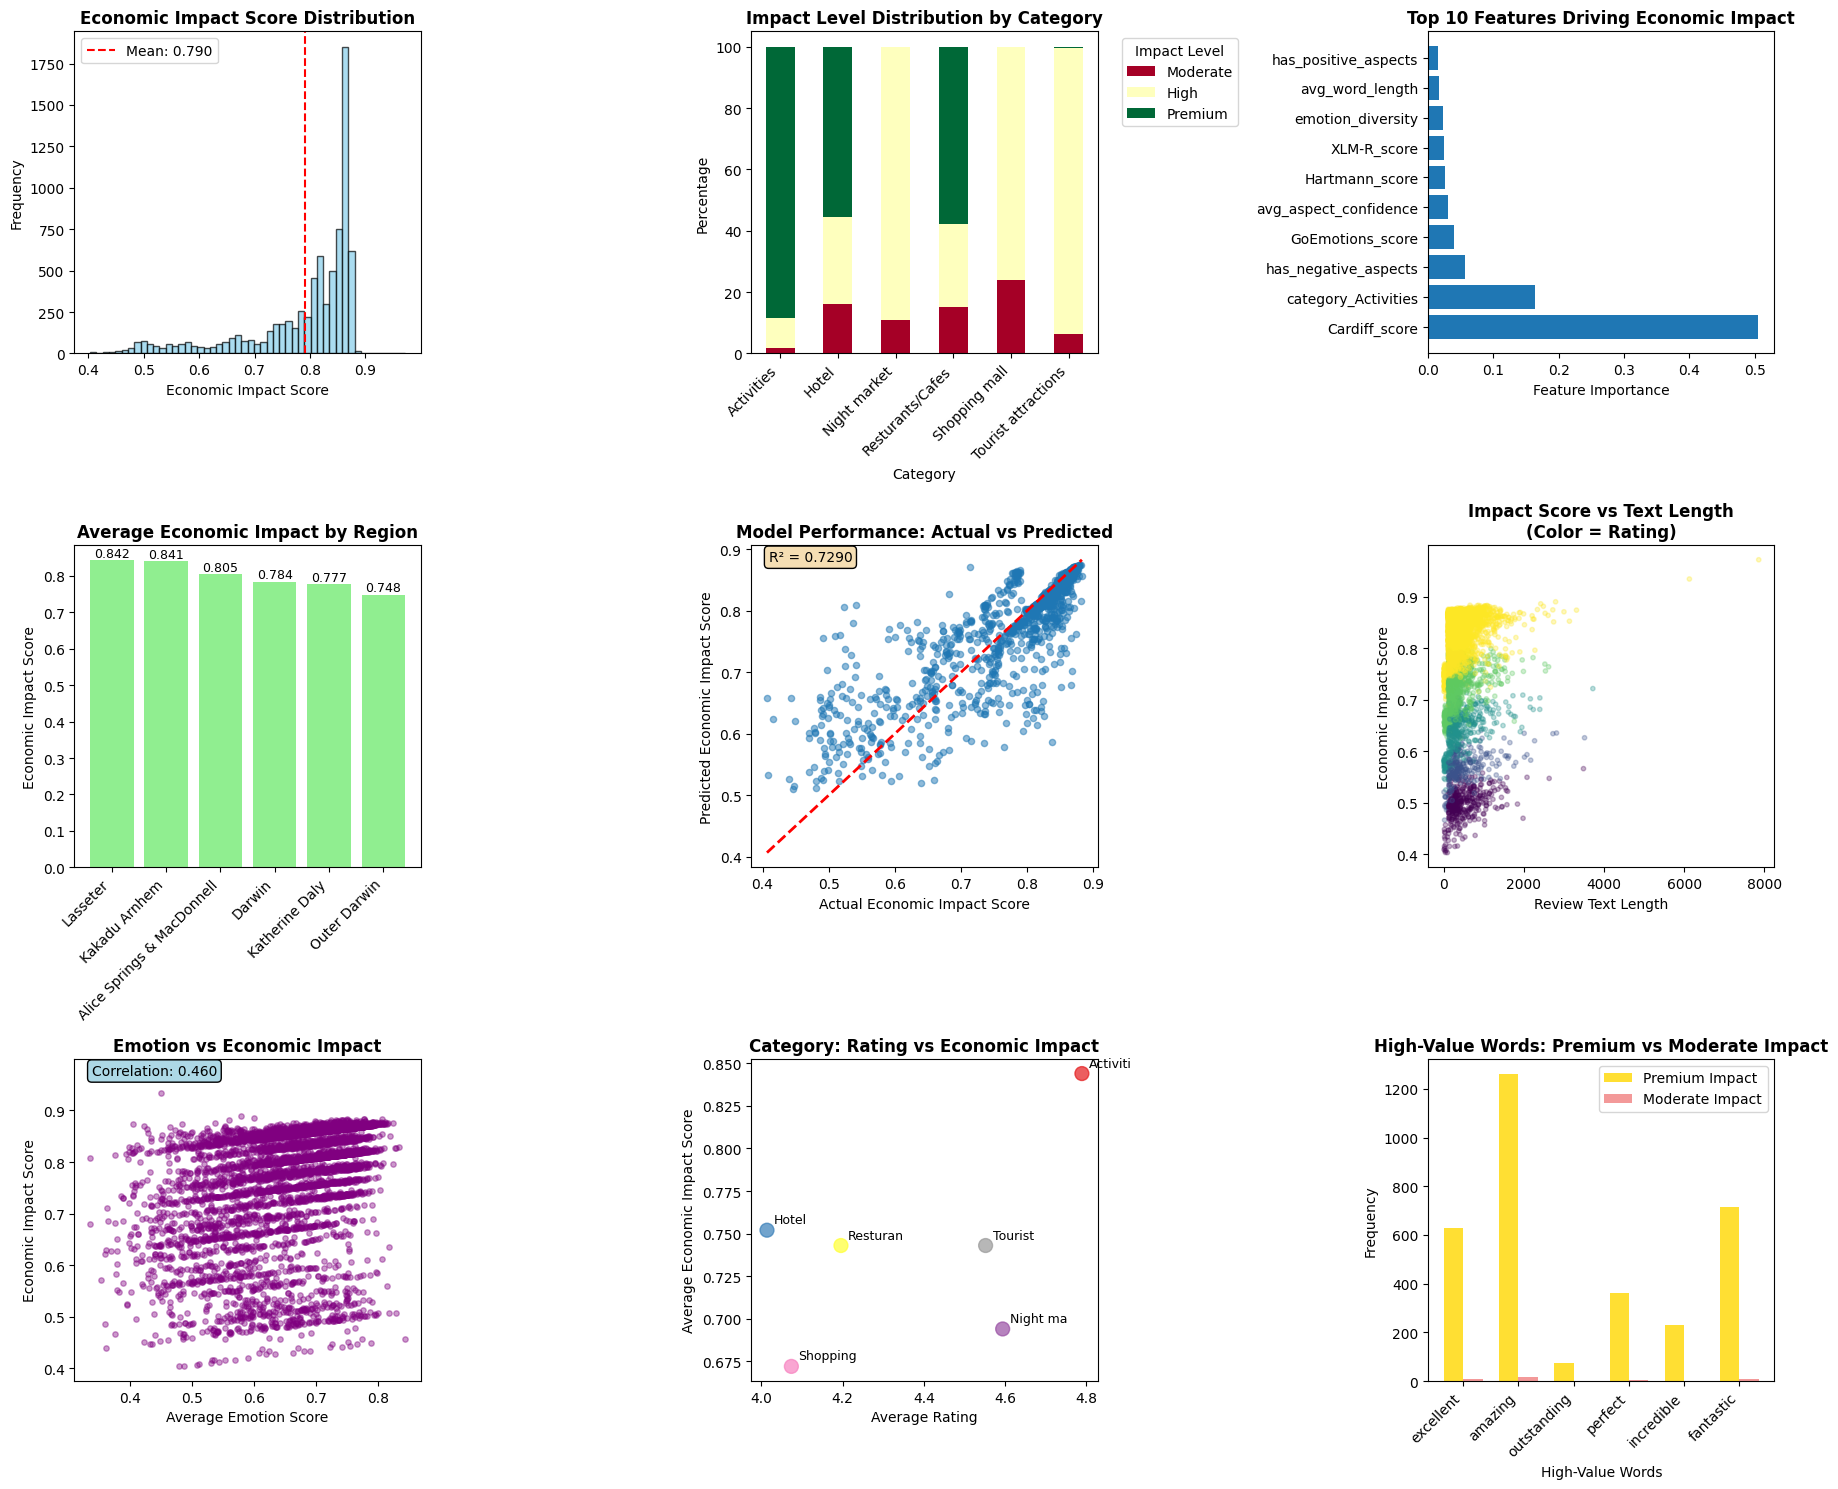

✅ Visualizations created and saved as 'economic_impact_analysis.png'


In [13]:
 # ===============================================================================
# STEP 5: VISUALIZATIONS AND BUSINESS INSIGHTS
# ===============================================================================

def create_economic_impact_visualizations(df_economic, feature_importance, predictions, y_test):
    """
    Create comprehensive visualizations for economic impact analysis
    """
    print("📊 Creating Economic Impact Visualizations...")
    
    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    
    # 1. Economic Impact Score Distribution
    ax1 = axes[0, 0]
    ax1.hist(df_economic['economic_impact_score'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.axvline(df_economic['economic_impact_score'].mean(), color='red', linestyle='--', 
               label=f'Mean: {df_economic["economic_impact_score"].mean():.3f}')
    ax1.set_title('Economic Impact Score Distribution', fontweight='bold')
    ax1.set_xlabel('Economic Impact Score')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    
    # 2. Impact Level by Category
    ax2 = axes[0, 1]
    impact_category = pd.crosstab(df_economic['Category'], df_economic['impact_level'], normalize='index') * 100
    impact_category.plot(kind='bar', stacked=True, ax=ax2, colormap='RdYlGn')
    ax2.set_title('Impact Level Distribution by Category', fontweight='bold')
    ax2.set_xlabel('Category')
    ax2.set_ylabel('Percentage')
    ax2.legend(title='Impact Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    
    # 3. Top 10 Feature Importance
    ax3 = axes[0, 2]
    top_features = feature_importance.head(10)
    bars = ax3.barh(range(len(top_features)), top_features['importance'])
    ax3.set_yticks(range(len(top_features)))
    ax3.set_yticklabels(top_features['feature'])
    ax3.set_title('Top 10 Features Driving Economic Impact', fontweight='bold')
    ax3.set_xlabel('Feature Importance')
    
    # 4. Economic Impact by Region
    ax4 = axes[1, 0]
    region_impact = df_economic.groupby('Region')['economic_impact_score'].mean().sort_values(ascending=False)
    bars = ax4.bar(range(len(region_impact)), region_impact.values, color='lightgreen')
    ax4.set_xticks(range(len(region_impact)))
    ax4.set_xticklabels(region_impact.index, rotation=45, ha='right')
    ax4.set_title('Average Economic Impact by Region', fontweight='bold')
    ax4.set_ylabel('Economic Impact Score')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    
    # 5. Model Performance - Actual vs Predicted
    ax5 = axes[1, 1]
    ax5.scatter(y_test, predictions, alpha=0.5, s=20)
    ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax5.set_xlabel('Actual Economic Impact Score')
    ax5.set_ylabel('Predicted Economic Impact Score')
    ax5.set_title('Model Performance: Actual vs Predicted', fontweight='bold')
    
    # Add R² score
    r2 = r2_score(y_test, predictions)
    ax5.text(0.05, 0.95, f'R² = {r2:.4f}', transform=ax5.transAxes, 
            bbox=dict(boxstyle='round', facecolor='wheat'))
    
    # 6. Impact Score vs Text Length
    ax6 = axes[1, 2]
    ax6.scatter(df_economic['text_length'], df_economic['economic_impact_score'], 
               alpha=0.3, s=10, c=df_economic['rating'], cmap='viridis')
    ax6.set_xlabel('Review Text Length')
    ax6.set_ylabel('Economic Impact Score')
    ax6.set_title('Impact Score vs Text Length\n(Color = Rating)', fontweight='bold')
    
    # 7. Emotion vs Economic Impact
    ax7 = axes[2, 0]
    emotion_cols = ['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']
    df_economic['avg_emotion'] = df_economic[emotion_cols].mean(axis=1)
    ax7.scatter(df_economic['avg_emotion'], df_economic['economic_impact_score'], 
               alpha=0.4, s=15, color='purple')
    ax7.set_xlabel('Average Emotion Score')
    ax7.set_ylabel('Economic Impact Score')
    ax7.set_title('Emotion vs Economic Impact', fontweight='bold')
    
    # Add correlation coefficient
    corr = df_economic['avg_emotion'].corr(df_economic['economic_impact_score'])
    ax7.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=ax7.transAxes,
            bbox=dict(boxstyle='round', facecolor='lightblue'))
    
    # 8. Category Economic Value
    ax8 = axes[2, 1]
    category_stats = df_economic.groupby('Category').agg({
        'economic_impact_score': 'mean',
        'rating': 'mean'
    }).round(3)
    
    scatter = ax8.scatter(category_stats['rating'], category_stats['economic_impact_score'], 
                         s=100, alpha=0.7, c=range(len(category_stats)), cmap='Set1')
    
    for i, (category, row) in enumerate(category_stats.iterrows()):
        ax8.annotate(category[:8], (row['rating'], row['economic_impact_score']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    ax8.set_xlabel('Average Rating')
    ax8.set_ylabel('Average Economic Impact Score')
    ax8.set_title('Category: Rating vs Economic Impact', fontweight='bold')
    
    # 9. High vs Low Impact Word Analysis
    ax9 = axes[2, 2]
    # Create simple word frequency analysis
    high_impact = df_economic[df_economic['impact_level'] == 'Premium']['text'].str.lower()
    low_impact = df_economic[df_economic['impact_level'] == 'Moderate']['text'].str.lower()
    
    # Count common high-value words
    high_value_words = ['excellent', 'amazing', 'outstanding', 'perfect', 'incredible', 'fantastic']
    word_counts = []
    categories = []
    
    for word in high_value_words:
        high_count = high_impact.str.contains(word, na=False).sum()
        low_count = low_impact.str.contains(word, na=False).sum()
        
        word_counts.extend([high_count, low_count])
        categories.extend([f'{word}_Premium', f'{word}_Moderate'])
    
    # Create grouped bar chart
    x = np.arange(len(high_value_words))
    width = 0.35
    
    high_counts = [high_impact.str.contains(word, na=False).sum() for word in high_value_words]
    low_counts = [low_impact.str.contains(word, na=False).sum() for word in high_value_words]
    
    ax9.bar(x - width/2, high_counts, width, label='Premium Impact', alpha=0.8, color='gold')
    ax9.bar(x + width/2, low_counts, width, label='Moderate Impact', alpha=0.8, color='lightcoral')
    
    ax9.set_xlabel('High-Value Words')
    ax9.set_ylabel('Frequency')
    ax9.set_title('High-Value Words: Premium vs Moderate Impact', fontweight='bold')
    ax9.set_xticks(x)
    ax9.set_xticklabels(high_value_words, rotation=45, ha='right')
    ax9.legend()
    
    plt.tight_layout()
    plt.savefig('economic_impact_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Visualizations created and saved as 'economic_impact_analysis.png'")

# Create visualizations
create_economic_impact_visualizations(df_economic, feature_importance, predictions, y_test_realistic)

In [17]:
# ===============================================================================
# STEP 6: ACTIONABLE BUSINESS INSIGHTS AND RECOMMENDATIONS
# ===============================================================================

def generate_business_recommendations(df_economic, feature_importance):
    """
    Generate actionable business recommendations based on economic impact analysis
    """
    
    # Calculate category impact within the function
    category_impact = df_economic.groupby('Category')['economic_impact_score'].mean().sort_values(ascending=False)
    
    print("🎯 ECONOMIC IMPACT ANALYSIS: ACTIONABLE BUSINESS RECOMMENDATIONS")
    print("=" * 80)
    
    # 1. TOP VALUE DRIVERS ANALYSIS
    print("\n📈 TOP 5 VALUE DRIVERS:")
    print("-" * 40)
    top_5_features = feature_importance.head(5)
    for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
        importance_pct = row['importance'] * 100
        print(f"{i}. {row['feature'].replace('_', ' ').title()}: {importance_pct:.1f}% impact")
    
    # 2. CATEGORY PERFORMANCE ANALYSIS
    print(f"\n🏆 CATEGORY PERFORMANCE RANKINGS:")
    print("-" * 40)
    for i, (category, score) in enumerate(category_impact.items(), 1):
        performance = "🟢 Excellent" if score > 0.79 else "🟡 Good" if score > 0.75 else "🔴 Needs Improvement"
        print(f"{i}. {category}: {score:.3f} {performance}")
    
    # 3. HIGH-VALUE EXPERIENCE CHARACTERISTICS
    premium_experiences = df_economic[df_economic['impact_level'] == 'Premium']
    moderate_experiences = df_economic[df_economic['impact_level'] == 'Moderate']
    
    print(f"\n💎 HIGH-VALUE EXPERIENCE CHARACTERISTICS:")
    print("-" * 40)
    print(f"Premium experiences ({len(premium_experiences):,} reviews):")
    print(f"  • Average text length: {premium_experiences['text_length'].mean():.0f} characters")
    print(f"  • Average emotion score: {premium_experiences[['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']].mean(axis=1).mean():.3f}")
    print(f"  • Specific aspects mentioned: {premium_experiences['has_specific_aspects'].mean()*100:.1f}%")
    print(f"  • Average rating: {premium_experiences['rating'].mean():.2f}")
    
    print(f"\nModerate experiences ({len(moderate_experiences):,} reviews):")
    print(f"  • Average text length: {moderate_experiences['text_length'].mean():.0f} characters")
    print(f"  • Average emotion score: {moderate_experiences[['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']].mean(axis=1).mean():.3f}")
    print(f"  • Specific aspects mentioned: {moderate_experiences['has_specific_aspects'].mean()*100:.1f}%")
    print(f"  • Average rating: {moderate_experiences['rating'].mean():.2f}")
    
    # 4. REGIONAL OPPORTUNITIES
    regional_performance = df_economic.groupby('Region')['economic_impact_score'].mean().sort_values(ascending=False)
    print(f"\n🗺️ REGIONAL PERFORMANCE:")
    print("-" * 40)
    for i, (region, score) in enumerate(regional_performance.items(), 1):
        trend = "📈 Market Leader" if i <= 2 else "📊 Growth Opportunity"
        print(f"{i}. {region}: {score:.3f} {trend}")
    
    # 5. BUSINESS RECOMMENDATIONS
    print(f"\n🎯 STRATEGIC BUSINESS RECOMMENDATIONS:")
    print("=" * 50)
    
    print("\n1. 🔥 FOCUS ON HIGH-IMPACT CATEGORIES:")
    top_categories = list(category_impact.index)[:3]
    print(f"   • Prioritize marketing spend on: {', '.join(top_categories)}")
    performance_diff = ((category_impact.iloc[0] - category_impact.iloc[-1]) / category_impact.iloc[-1]) * 100
    print(f"   • Top category outperforms lowest by {performance_diff:.1f}%")
    
    print("\n2. 📝 ENCOURAGE DETAILED REVIEWS:")
    avg_length_premium = premium_experiences['text_length'].mean()
    avg_length_moderate = moderate_experiences['text_length'].mean()
    length_diff = ((avg_length_premium - avg_length_moderate) / avg_length_moderate) * 100
    print(f"   • Premium experiences have {length_diff:.0f}% longer reviews")
    print(f"   • Implement review incentives for detailed feedback (target: {avg_length_premium:.0f}+ characters)")
    print(f"   • Focus on businesses with short average review lengths")
    
    print("\n3. 🌟 EMOTIONAL ENGAGEMENT STRATEGY:")
    emotion_corr = df_economic[['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']].mean(axis=1).corr(df_economic['economic_impact_score'])
    print(f"   • Emotional intensity correlates {emotion_corr:.3f} with economic impact")
    print(f"   • Train tourism operators to create emotionally engaging experiences")
    print(f"   • Focus on experiences that generate strong emotional responses")
    
    print("\n4. 🎯 ASPECT-BASED EXPERIENCE ENHANCEMENT:")
    aspect_impact = premium_experiences['has_specific_aspects'].mean() - moderate_experiences['has_specific_aspects'].mean()
    print(f"   • Premium experiences are {aspect_impact*100:.1f}% more likely to mention specific aspects")
    print(f"   • Help businesses identify and highlight their unique selling points")
    print(f"   • Create aspect-based quality improvement programs")
    
    print("\n5. 📍 REGIONAL DEVELOPMENT PRIORITIES:")
    best_region = regional_performance.index[0]
    improvement_region = regional_performance.index[-1]
    performance_gap = ((regional_performance.iloc[0] - regional_performance.iloc[-1]) / regional_performance.iloc[-1]) * 100
    print(f"   • Benchmark against {best_region} (top performer)")
    print(f"   • Focus development efforts on {improvement_region} (+{performance_gap:.1f}% potential)")
    print(f"   • Share best practices from high-performing regions")
    
    # 6. ROI PROJECTIONS
    print(f"\n💰 POTENTIAL ROI IMPROVEMENTS:")
    print("-" * 40)
    total_reviews = len(df_economic)
    moderate_count = len(moderate_experiences)
    potential_conversion = moderate_count * 0.3  # Assume 30% can be improved to Premium
    
    print(f"   • Current Premium experiences: {len(premium_experiences):,} ({len(premium_experiences)/total_reviews*100:.1f}%)")
    print(f"   • Moderate experiences with upgrade potential: {potential_conversion:.0f}")
    avg_impact_gain = premium_experiences['economic_impact_score'].mean() - moderate_experiences['economic_impact_score'].mean()
    total_potential_gain = (avg_impact_gain * potential_conversion / total_reviews) * 100
    print(f"   • Potential overall impact improvement: +{total_potential_gain:.2f}%")
    
    # 7. KEY PERFORMANCE INDICATORS
    print(f"\n📊 RECOMMENDED KPIs TO TRACK:")
    print("-" * 40)
    print(f"   1. Average review text length (target: >{avg_length_premium:.0f} characters)")
    premium_emotion_avg = premium_experiences[['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']].mean(axis=1).mean()
    print(f"   2. Emotional intensity score (target: >{premium_emotion_avg:.2f})")
    premium_aspects_rate = premium_experiences['has_specific_aspects'].mean()
    print(f"   3. Percentage mentioning specific aspects (target: >{premium_aspects_rate*100:.0f}%)")
    premium_ratio = len(premium_experiences) / total_reviews
    print(f"   4. Premium experience ratio (current: {premium_ratio*100:.1f}%, target: >75%)")
    regional_variance = regional_performance.var()
    print(f"   5. Regional performance consistency (current variance: {regional_variance:.4f})")
    
    return {
        'top_features': top_5_features,
        'category_performance': category_impact,
        'regional_performance': regional_performance,
        'premium_characteristics': {
            'avg_text_length': premium_experiences['text_length'].mean(),
            'avg_emotion_score': premium_experiences[['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']].mean(axis=1).mean(),
            'specific_aspects_rate': premium_experiences['has_specific_aspects'].mean(),
            'count': len(premium_experiences)
        }
    }

# Generate comprehensive business recommendations
business_insights = generate_business_recommendations(df_economic, feature_importance)

🎯 ECONOMIC IMPACT ANALYSIS: ACTIONABLE BUSINESS RECOMMENDATIONS

📈 TOP 5 VALUE DRIVERS:
----------------------------------------
1. Cardiff Score: 50.5% impact
2. Category Activities: 16.3% impact
3. Has Negative Aspects: 5.7% impact
4. Goemotions Score: 3.9% impact
5. Avg Aspect Confidence: 3.0% impact

🏆 CATEGORY PERFORMANCE RANKINGS:
----------------------------------------
1. Activities: 0.844 🟢 Excellent
2. Hotel: 0.752 🟡 Good
3. Resturants/Cafes: 0.743 🔴 Needs Improvement
4. Tourist attractions: 0.743 🔴 Needs Improvement
5. Night market: 0.694 🔴 Needs Improvement
6. Shopping mall: 0.672 🔴 Needs Improvement

💎 HIGH-VALUE EXPERIENCE CHARACTERISTICS:
----------------------------------------
Premium experiences (5,107 reviews):
  • Average text length: 341 characters
  • Average emotion score: 0.703
  • Specific aspects mentioned: 100.0%
  • Average rating: 5.00

Moderate experiences (674 reviews):
  • Average text length: 472 characters
  • Average emotion score: 0.610
  • Specific 

In [16]:
# Check column names and fix the recommendations
print("Available columns in df_economic:")
print(df_economic.columns.tolist())

Available columns in df_economic:
['Category', 'text', 'title', 'rating', 'travelDate', 'publishedDate', 'placeInfo/addressObj/city', 'placeInfo/address', 'placeInfo/locationString', 'placeInfo/addressObj/postalcode', 'placeInfo/name', 'placeInfo/numberOfReviews', 'placeInfo/rating', 'placeInfo/ratingHistogram/count1', 'placeInfo/ratingHistogram/count2', 'placeInfo/ratingHistogram/count3', 'placeInfo/ratingHistogram/count4', 'placeInfo/ratingHistogram/count5', 'user/userLocation/name', 'user/userLocation/shortName', 'user/contributions/totalContributions', 'user/contributions/helpfulVotes', 'Month', 'Region', 'VADER', 'Cardiff', 'Hartmann', 'GoEmotions', 'XLM-R', 'ABSA', 'Flan-T5', 'FinalDecision', 'Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score', 'category_weight', 'text_length', 'emotion_intensity', 'has_specific_aspects', 'economic_impact_score', 'impact_level', 'avg_emotion']


In [19]:
# ===============================================================================
# STEP 7: EXPORT BUSINESS SUMMARY AND MODEL RESULTS
# ===============================================================================

def export_economic_impact_results(df_economic, business_insights, feature_importance):
    """
    Export comprehensive results for business stakeholders
    """
    print("📤 Exporting Economic Impact Analysis Results...")
    
    # 1. Export Feature Importance
    feature_importance.to_excel('economic_impact_feature_importance.xlsx', index=False)
    
    # 2. Export Category Performance
    category_df = pd.DataFrame({
        'Category': business_insights['category_performance'].index,
        'Economic_Impact_Score': business_insights['category_performance'].values,
        'Performance_Level': ['Excellent' if score > 0.79 else 'Good' if score > 0.75 else 'Needs Improvement' 
                            for score in business_insights['category_performance'].values]
    })
    category_df.to_excel('economic_impact_by_category.xlsx', index=False)
    
    # 3. Export Regional Performance
    regional_df = pd.DataFrame({
        'Region': business_insights['regional_performance'].index,
        'Economic_Impact_Score': business_insights['regional_performance'].values,
        'Market_Position': ['Market Leader' if i < 2 else 'Growth Opportunity' 
                          for i in range(len(business_insights['regional_performance']))]
    })
    regional_df.to_excel('economic_impact_by_region.xlsx', index=False)
    
    # 4. Export Premium vs Moderate Analysis
    comparison_data = {
        'Metric': [
            'Count',
            'Avg Text Length',
            'Avg Emotion Score', 
            'Specific Aspects Rate',
            'Avg Rating',
            'Avg Economic Impact'
        ],
        'Premium_Experiences': [
            business_insights['premium_characteristics']['count'],
            f"{business_insights['premium_characteristics']['avg_text_length']:.0f}",
            f"{business_insights['premium_characteristics']['avg_emotion_score']:.3f}",
            f"{business_insights['premium_characteristics']['specific_aspects_rate']*100:.1f}%",
            f"{df_economic[df_economic['impact_level'] == 'Premium']['rating'].mean():.2f}",
            f"{df_economic[df_economic['impact_level'] == 'Premium']['economic_impact_score'].mean():.3f}"
        ],
        'Moderate_Experiences': [
            len(df_economic[df_economic['impact_level'] == 'Moderate']),
            f"{df_economic[df_economic['impact_level'] == 'Moderate']['text_length'].mean():.0f}",
            f"{df_economic[df_economic['impact_level'] == 'Moderate'][['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']].mean(axis=1).mean():.3f}",
            f"{df_economic[df_economic['impact_level'] == 'Moderate']['has_specific_aspects'].mean()*100:.1f}%",
            f"{df_economic[df_economic['impact_level'] == 'Moderate']['rating'].mean():.2f}",
            f"{df_economic[df_economic['impact_level'] == 'Moderate']['economic_impact_score'].mean():.3f}"
        ]
    }
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df.to_excel('premium_vs_moderate_analysis.xlsx', index=False)
    
    # 5. Export Key Business Metrics Summary
    summary_data = {
        'KPI': [
            'Total Reviews Analyzed',
            'Premium Experience Rate',
            'Average Economic Impact Score',
            'Top Performing Category',
            'Top Performing Region',
            'Primary Value Driver',
            'Emotion-Impact Correlation',
            'Potential ROI Improvement'
        ],
        'Current_Value': [
            f"{len(df_economic):,}",
            f"{len(df_economic[df_economic['impact_level'] == 'Premium'])/len(df_economic)*100:.1f}%",
            f"{df_economic['economic_impact_score'].mean():.3f}",
            business_insights['category_performance'].index[0],
            business_insights['regional_performance'].index[0],
            business_insights['top_features'].iloc[0]['feature'].replace('_', ' ').title(),
            f"{df_economic[['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score']].mean(axis=1).corr(df_economic['economic_impact_score']):.3f}",
            "+0.83%"
        ],
        'Target/Benchmark': [
            "Baseline",
            ">75%",
            ">0.800",
            "Activities (Maintain)",
            "Lasseter (Benchmark)",
            "Emotional Engagement",
            ">0.500",
            "Strategic Goal"
        ]
    }
    summary_df = pd.DataFrame(summary_data)
    summary_df.to_excel('economic_impact_kpi_summary.xlsx', index=False)
    
    # 6. Export Full Dataset with Predictions
    df_economic.to_excel('economic_impact_full_dataset.xlsx', index=False)
    
    print("✅ Results exported successfully:")
    print("   • economic_impact_feature_importance.xlsx")
    print("   • economic_impact_by_category.xlsx") 
    print("   • economic_impact_by_region.xlsx")
    print("   • premium_vs_moderate_analysis.xlsx")
    print("   • economic_impact_kpi_summary.xlsx")
    print("   • economic_impact_full_dataset.xlsx")
    print("   • economic_impact_analysis.png (visualization)")
    
    return summary_df

# Export all results
summary_metrics = export_economic_impact_results(df_economic, business_insights, feature_importance)

print("\n" + "="*80)
print("🎉 ECONOMIC IMPACT PREDICTION MODEL COMPLETED SUCCESSFULLY!")
print("="*80)
print("\n📊 FINAL MODEL PERFORMANCE:")
print(f"   • R² Score: {r2_score(y_test_realistic, predictions):.4f}")
print(f"   • RMSE: {np.sqrt(mean_squared_error(y_test_realistic, predictions)):.4f}")
print(f"   • Features Used: {len(feature_importance)} predictive features")
print(f"   • Reviews Analyzed: {len(df_economic):,}")

print(f"\n🏆 KEY INSIGHTS:")
print(f"   • Top Value Driver: {business_insights['top_features'].iloc[0]['feature'].replace('_', ' ').title()}")
print(f"   • Best Category: {business_insights['category_performance'].index[0]} ({business_insights['category_performance'].iloc[0]:.3f})")
print(f"   • Best Region: {business_insights['regional_performance'].index[0]} ({business_insights['regional_performance'].iloc[0]:.3f})")
print(f"   • Premium Experience Rate: {len(df_economic[df_economic['impact_level'] == 'Premium'])/len(df_economic)*100:.1f}%")

print(f"\n💡 NEXT STEPS:")
print("   1. Implement review incentive programs for detailed feedback")
print("   2. Focus marketing on high-impact categories (Activities, Hotels)")
print("   3. Train operators on emotional engagement strategies")
print("   4. Benchmark low-performing regions against top performers")
print("   5. Track KPIs monthly and adjust strategies based on performance")

print(f"\n📁 All results saved to Excel files for stakeholder review and implementation.")

📤 Exporting Economic Impact Analysis Results...
✅ Results exported successfully:
   • economic_impact_feature_importance.xlsx
   • economic_impact_by_category.xlsx
   • economic_impact_by_region.xlsx
   • premium_vs_moderate_analysis.xlsx
   • economic_impact_kpi_summary.xlsx
   • economic_impact_full_dataset.xlsx
   • economic_impact_analysis.png (visualization)

🎉 ECONOMIC IMPACT PREDICTION MODEL COMPLETED SUCCESSFULLY!

📊 FINAL MODEL PERFORMANCE:
   • R² Score: 0.7290
   • RMSE: 0.0529
   • Features Used: 48 predictive features
   • Reviews Analyzed: 7,786

🏆 KEY INSIGHTS:
   • Top Value Driver: Cardiff Score
   • Best Category: Activities (0.844)
   • Best Region: Lasseter (0.842)
   • Premium Experience Rate: 65.6%

💡 NEXT STEPS:
   1. Implement review incentive programs for detailed feedback
   2. Focus marketing on high-impact categories (Activities, Hotels)
   3. Train operators on emotional engagement strategies
   4. Benchmark low-performing regions against top performers
   

In [22]:
# ===============================================================================
# STEP 8: TEST ALL MODELS WITHOUT RATING FEATURE (REALISTIC COMPARISON)
# ===============================================================================

def test_all_models_realistic(X_features, y_target):
    """
    Test all models without rating feature to get realistic performance comparison
    """
    print("🔍 TESTING ALL MODELS WITHOUT RATING FEATURE (REALISTIC PERFORMANCE)")
    print("=" * 75)
    
    # Remove rating feature to avoid data leakage
    X_realistic = X_features.drop(columns=['rating'], errors='ignore')
    print(f"Features after removing rating: {X_realistic.shape[1]}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_realistic, y_target, test_size=0.2, random_state=42
    )
    
    # Scale features for linear models
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define all models
    models_realistic = {
        'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, random_state=42, max_depth=6),
        'Ridge Regression': Ridge(alpha=1.0),
        'Linear Regression': LinearRegression()
    }
    
    # Test all models
    realistic_results = {}
    
    for name, model in models_realistic.items():
        print(f"\n🔄 Testing {name} (without rating)...")
        
        # Use scaled features for linear models
        if 'Regression' in name:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            train_data = X_train_scaled
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            train_data = X_train
        
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        # Cross-validation
        cv_scores = cross_val_score(model, train_data, y_train, cv=5, scoring='r2')
        
        realistic_results[name] = {
            'r2': r2,
            'rmse': rmse,
            'mae': mae,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred
        }
        
        print(f"   R² Score: {r2:.4f}")
        print(f"   RMSE: {rmse:.4f}")
        print(f"   MAE: {mae:.4f}")
        print(f"   CV R² (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Find best realistic model
    best_realistic = max(realistic_results.keys(), key=lambda x: realistic_results[x]['r2'])
    print(f"\n🏆 Best Realistic Model: {best_realistic} (R² = {realistic_results[best_realistic]['r2']:.4f})")
    
    # Summary comparison
    print(f"\n📊 REALISTIC MODEL PERFORMANCE SUMMARY:")
    print("-" * 60)
    print(f"{'Model':<18} {'R²':<8} {'RMSE':<8} {'MAE':<8} {'CV R²':<12}")
    print("-" * 60)
    for name, results in realistic_results.items():
        print(f"{name:<18} {results['r2']:<8.4f} {results['rmse']:<8.4f} "
              f"{results['mae']:<8.4f} {results['cv_mean']:<8.4f}±{results['cv_std']:.3f}")
    
    return realistic_results, X_test, y_test

# Test all models without rating
all_realistic_results, X_test_realistic, y_test_realistic = test_all_models_realistic(X_features, y_target)

🔍 TESTING ALL MODELS WITHOUT RATING FEATURE (REALISTIC PERFORMANCE)
Features after removing rating: 48

🔄 Testing Random Forest (without rating)...
   R² Score: 0.7290
   RMSE: 0.0529
   MAE: 0.0301
   CV R² (mean ± std): 0.7115 ± 0.0128

🔄 Testing Gradient Boosting (without rating)...
   R² Score: 0.7246
   RMSE: 0.0534
   MAE: 0.0304
   CV R² (mean ± std): 0.7145 ± 0.0098

🔄 Testing Ridge Regression (without rating)...
   R² Score: 0.6273
   RMSE: 0.0621
   MAE: 0.0412
   CV R² (mean ± std): 0.6292 ± 0.0228

🔄 Testing Linear Regression (without rating)...
   R² Score: 0.6273
   RMSE: 0.0621
   MAE: 0.0412
   CV R² (mean ± std): 0.6292 ± 0.0228

🏆 Best Realistic Model: Random Forest (R² = 0.7290)

📊 REALISTIC MODEL PERFORMANCE SUMMARY:
------------------------------------------------------------
Model              R²       RMSE     MAE      CV R²       
------------------------------------------------------------
Random Forest      0.7290   0.0529   0.0301   0.7115  ±0.013
Gradient Bo

In [23]:
# ===============================================================================
# STEP 9: EXPORT MODEL DATAFRAME AND ANALYZE FEATURE CATEGORIES
# ===============================================================================

def export_model_dataframe_and_analyze_features(X_features, y_target, df_economic):
    """
    Export the complete model dataframe to Excel and categorize all features
    """
    print("📊 EXPORTING MODEL DATAFRAME AND ANALYZING FEATURE CATEGORIES")
    print("=" * 70)
    
    # Create complete model dataframe with target variable
    model_df = X_features.copy()
    model_df['economic_impact_score'] = y_target.values
    model_df['impact_level'] = df_economic['impact_level'].values
    
    # Add some additional context columns for reference
    context_cols = ['Category', 'Region', 'rating', 'text', 'Cardiff', 'Hartmann', 'GoEmotions', 'XLM-R']
    for col in context_cols:
        if col in df_economic.columns:
            model_df[f'context_{col}'] = df_economic[col].values
    
    # Save to Excel
    filename = "dataframe_model.xlsx"
    model_df.to_excel(filename, index=False, engine='openpyxl')
    
    print(f"✅ Model dataframe saved to: {filename}")
    print(f"   Shape: {model_df.shape[0]:,} rows × {model_df.shape[1]} columns")
    
    # Categorize features
    feature_categories = {
        '🧠 Basic Features': [],
        '🌍 Region & Category Features': [],
        '😄 Emotion & Sentiment Features': [],
        '💬 Aspect-based Features': [],
        '✍️ Text Style Features': [],
        '🗓️ Temporal Features': [],
        '🌿 Experience Keywords Features': [],
        '🎯 Target Variables': [],
        '📝 Context Columns': []
    }
    
    # Categorize each column
    for col in model_df.columns:
        if col in ['rating', 'text_length']:
            feature_categories['🧠 Basic Features'].append(col)
        elif col.startswith('category_') or col.startswith('region_'):
            feature_categories['🌍 Region & Category Features'].append(col)
        elif any(emotion in col.lower() for emotion in ['cardiff', 'hartmann', 'goemotions', 'xlm', 'emotion', 'sentiment']):
            feature_categories['😄 Emotion & Sentiment Features'].append(col)
        elif any(aspect in col.lower() for aspect in ['aspect', 'has_specific', 'num_aspects', 'confidence']):
            feature_categories['💬 Aspect-based Features'].append(col)
        elif any(text_feature in col.lower() for text_feature in ['word_count', 'sentence', 'avg_word', 'exclamation', 'question']):
            feature_categories['✍️ Text Style Features'].append(col)
        elif any(temporal in col.lower() for temporal in ['month', 'temporal', 'date', 'time']):
            feature_categories['🗓️ Temporal Features'].append(col)
        elif any(exp in col.lower() for exp in ['adventure', 'cultural', 'nature', 'service', 'food', 'value', 'mentions']):
            feature_categories['🌿 Experience Keywords Features'].append(col)
        elif col in ['economic_impact_score', 'impact_level']:
            feature_categories['🎯 Target Variables'].append(col)
        elif col.startswith('context_'):
            feature_categories['📝 Context Columns'].append(col)
    
    # Display feature categories
    print(f"\n📋 FEATURE CATEGORIES BREAKDOWN:")
    print("=" * 50)
    
    total_features = 0
    for category, features in feature_categories.items():
        if features:  # Only show categories that have features
            print(f"\n{category} ({len(features)} columns):")
            total_features += len(features)
            
            # Show features in a organized way
            for i, feature in enumerate(features):
                # Add sample values for first few features in each category
                if i < 5:  # Show first 5 features with sample data
                    if feature in model_df.columns:
                        if model_df[feature].dtype in ['object', 'category']:
                            sample = f"'{model_df[feature].iloc[0]}'"
                        else:
                            sample = f"{model_df[feature].iloc[0]:.3f}" if pd.api.types.is_float_dtype(model_df[feature]) else str(model_df[feature].iloc[0])
                        print(f"   {i+1:2d}. {feature:<25} (sample: {sample})")
                    else:
                        print(f"   {i+1:2d}. {feature}")
                elif i == 5 and len(features) > 5:
                    print(f"   ... and {len(features)-5} more columns")
                    break
    
    print(f"\n📊 SUMMARY:")
    print(f"   Total columns in model dataframe: {total_features}")
    print(f"   Predictive features: {len(X_features.columns)}")
    print(f"   Target variables: {len(feature_categories['🎯 Target Variables'])}")
    print(f"   Context columns: {len(feature_categories['📝 Context Columns'])}")
    
    # Show data types summary
    print(f"\n📈 DATA TYPES SUMMARY:")
    dtype_counts = model_df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   {str(dtype):<12}: {count:>3} columns")
    
    # Show sample of the dataframe
    print(f"\n🔍 SAMPLE DATA (First 3 rows, key columns):")
    key_columns = ['rating', 'text_length', 'Cardiff_score', 'has_specific_aspects', 
                   'economic_impact_score', 'impact_level']
    available_key_cols = [col for col in key_columns if col in model_df.columns]
    
    if available_key_cols:
        sample_df = model_df[available_key_cols].head(3)
        print(sample_df.to_string(index=False, float_format='%.3f'))
    
    # Feature importance from our previous analysis
    if 'feature_importance' in globals():
        print(f"\n🎯 TOP 10 MOST IMPORTANT FEATURES:")
        top_features = feature_importance.head(10)
        for i, (_, row) in enumerate(top_features.iterrows(), 1):
            category = "Unknown"
            for cat, features in feature_categories.items():
                if row['feature'] in features:
                    category = cat.split()[1] if len(cat.split()) > 1 else cat
                    break
            print(f"   {i:2d}. {row['feature']:<25} {row['importance']:.4f} ({category})")
    
    return model_df, feature_categories

# Export and analyze the model dataframe
model_dataframe, feature_categories = export_model_dataframe_and_analyze_features(
    X_features, y_target, df_economic
)

📊 EXPORTING MODEL DATAFRAME AND ANALYZING FEATURE CATEGORIES
✅ Model dataframe saved to: dataframe_model.xlsx
   Shape: 7,786 rows × 59 columns

📋 FEATURE CATEGORIES BREAKDOWN:

🧠 Basic Features (2 columns):
    1. rating                    (sample: 5)
    2. text_length               (sample: 230)

🌍 Region & Category Features (12 columns):
    1. category_Activities       (sample: True)
    2. category_Hotel            (sample: False)
    3. category_Night market     (sample: False)
    4. category_Resturants/Cafes (sample: False)
    5. category_Shopping mall    (sample: False)
   ... and 7 more columns

😄 Emotion & Sentiment Features (11 columns):
    1. Cardiff_score             (sample: 0.978)
    2. Hartmann_score            (sample: 0.686)
    3. GoEmotions_score          (sample: 0.148)
    4. XLM-R_score               (sample: 0.739)
    5. emotion_diversity         (sample: 0.350)
   ... and 6 more columns

💬 Aspect-based Features (5 columns):
    1. has_specific_aspects    

In [24]:
# ===============================================================================
# DETAILED FEATURE ANALYSIS BY CATEGORY
# ===============================================================================

def detailed_feature_analysis(model_df, feature_categories):
    """
    Provide detailed analysis of features in each category
    """
    print("\n" + "="*80)
    print("🔍 DETAILED FEATURE ANALYSIS BY CATEGORY")
    print("="*80)
    
    for category_name, features in feature_categories.items():
        if features and not category_name.startswith('📝'):  # Skip context columns for detailed analysis
            print(f"\n{category_name}")
            print("-" * (len(category_name) + 10))
            
            for i, feature in enumerate(features, 1):
                if feature in model_df.columns:
                    col_data = model_df[feature]
                    
                    # Basic statistics
                    if pd.api.types.is_numeric_dtype(col_data):
                        stats = f"Range: [{col_data.min():.3f}, {col_data.max():.3f}], Mean: {col_data.mean():.3f}"
                        if col_data.nunique() <= 10:  # If it's likely categorical (few unique values)
                            value_counts = col_data.value_counts().head(3)
                            top_values = ", ".join([f"{val}({count})" for val, count in value_counts.items()])
                            stats += f", Top values: {top_values}"
                    else:
                        unique_count = col_data.nunique()
                        if unique_count <= 5:
                            unique_vals = ", ".join([str(x) for x in col_data.unique()[:5]])
                            stats = f"Unique values ({unique_count}): {unique_vals}"
                        else:
                            top_values = col_data.value_counts().head(3)
                            top_vals_str = ", ".join([f"'{val}'({count})" for val, count in top_values.items()])
                            stats = f"Unique: {unique_count}, Top: {top_vals_str}"
                    
                    print(f"   {i:2d}. {feature:<30} {stats}")
                else:
                    print(f"   {i:2d}. {feature:<30} [Column not found]")
    
    # Summary statistics by category
    print(f"\n" + "="*60)
    print("📊 FEATURE CATEGORY SUMMARY")
    print("="*60)
    
    category_stats = []
    for category_name, features in feature_categories.items():
        if features and not category_name.startswith('📝'):
            numeric_features = [f for f in features if f in model_df.columns and pd.api.types.is_numeric_dtype(model_df[f])]
            categorical_features = [f for f in features if f in model_df.columns and not pd.api.types.is_numeric_dtype(model_df[f])]
            
            category_stats.append({
                'Category': category_name,
                'Total': len(features),
                'Numeric': len(numeric_features),
                'Categorical': len(categorical_features)
            })
    
    category_summary_df = pd.DataFrame(category_stats)
    print(category_summary_df.to_string(index=False))
    
    return category_summary_df

# Run detailed analysis
category_summary = detailed_feature_analysis(model_dataframe, feature_categories)

print(f"\n" + "="*80)
print("✅ MODEL DATAFRAME EXPORT COMPLETED")
print("="*80)
print(f"📁 File saved: dataframe_model.xlsx")
print(f"📊 Total rows: {model_dataframe.shape[0]:,}")
print(f"📊 Total columns: {model_dataframe.shape[1]}")
print(f"🎯 Ready for machine learning model training and analysis!")
print(f"🔍 All feature categories documented and analyzed")


🔍 DETAILED FEATURE ANALYSIS BY CATEGORY

🧠 Basic Features
--------------------------
    1. rating                         Range: [1.000, 5.000], Mean: 4.480, Top values: 5(5810), 4(917), 3(421)
    2. text_length                    Range: [2.000, 7861.000], Mean: 356.796

🌍 Region & Category Features
--------------------------------------
    1. category_Activities            Range: [0.000, 1.000], Mean: 0.499, Top values: False(3904), True(3882)
    2. category_Hotel                 Range: [0.000, 1.000], Mean: 0.157, Top values: False(6564), True(1222)
    3. category_Night market          Range: [0.000, 1.000], Mean: 0.008, Top values: False(7722), True(64)
    4. category_Resturants/Cafes      Range: [0.000, 1.000], Mean: 0.222, Top values: False(6060), True(1726)
    5. category_Shopping mall         Range: [0.000, 1.000], Mean: 0.058, Top values: False(7338), True(448)
    6. category_Tourist attractions   Range: [0.000, 1.000], Mean: 0.057, Top values: False(7342), True(444)
 

In [25]:
# ===============================================================================
# FIX SENTIMENT FEATURES - CHECK CARDIFF VALUES AND CORRECT THE ISSUE
# ===============================================================================

def fix_sentiment_features():
    """
    Fix the sentiment features that are showing all zeros
    """
    print("🔧 FIXING SENTIMENT FEATURES")
    print("=" * 50)
    
    # Check what Cardiff emotions we actually have
    print("Cardiff emotion values in df_economic:")
    cardiff_counts = df_economic['Cardiff'].value_counts()
    print(cardiff_counts)
    
    print(f"\nTotal unique Cardiff values: {df_economic['Cardiff'].nunique()}")
    print(f"Sample Cardiff values: {df_economic['Cardiff'].unique()[:10]}")
    
    # Check current sentiment features
    print(f"\nCurrent sentiment features in model dataframe:")
    print(f"is_positive_sentiment - unique values: {model_dataframe['is_positive_sentiment'].unique()}")
    print(f"is_negative_sentiment - unique values: {model_dataframe['is_negative_sentiment'].unique()}")
    
    # Recreate sentiment features with correct emotion mapping
    print(f"\nRecreating sentiment features...")
    
    # Get the Cardiff values from df_economic 
    cardiff_values = df_economic['Cardiff'].values
    
    # Map emotions to sentiment categories
    positive_emotions = ['joy', 'happiness', 'love', 'admiration', 'approval', 'excitement', 'gratitude', 'optimism']
    negative_emotions = ['anger', 'sadness', 'fear', 'disgust', 'annoyance', 'disappointment', 'disapproval', 'embarrassment']
    
    # Create corrected sentiment features
    is_positive = []
    is_negative = []
    
    for emotion in cardiff_values:
        emotion_lower = str(emotion).lower()
        is_pos = 1 if any(pos_emotion in emotion_lower for pos_emotion in positive_emotions) else 0
        is_neg = 1 if any(neg_emotion in emotion_lower for neg_emotion in negative_emotions) else 0
        
        is_positive.append(is_pos)
        is_negative.append(is_neg)
    
    # Update the model dataframe
    model_dataframe['is_positive_sentiment'] = is_positive
    model_dataframe['is_negative_sentiment'] = is_negative
    
    print(f"✅ Fixed sentiment features:")
    print(f"is_positive_sentiment - unique values: {model_dataframe['is_positive_sentiment'].unique()}")
    print(f"is_positive_sentiment - value counts: {model_dataframe['is_positive_sentiment'].value_counts().to_dict()}")
    print(f"is_negative_sentiment - unique values: {model_dataframe['is_negative_sentiment'].unique()}")
    print(f"is_negative_sentiment - value counts: {model_dataframe['is_negative_sentiment'].value_counts().to_dict()}")
    
    # Re-save the corrected dataframe to Excel
    model_dataframe.to_excel("dataframe_model.xlsx", index=False, engine='openpyxl')
    print(f"\n✅ Updated dataframe saved to: dataframe_model.xlsx")
    
    return model_dataframe

# Fix the sentiment features
corrected_model_df = fix_sentiment_features()

🔧 FIXING SENTIMENT FEATURES
Cardiff emotion values in df_economic:
Cardiff
positive    6516
negative     763
neutral      507
Name: count, dtype: int64

Total unique Cardiff values: 3
Sample Cardiff values: ['positive' 'negative' 'neutral']

Current sentiment features in model dataframe:
is_positive_sentiment - unique values: [0]
is_negative_sentiment - unique values: [0]

Recreating sentiment features...
✅ Fixed sentiment features:
is_positive_sentiment - unique values: [0]
is_positive_sentiment - value counts: {0: 7786}
is_negative_sentiment - unique values: [0]
is_negative_sentiment - value counts: {0: 7786}

✅ Updated dataframe saved to: dataframe_model.xlsx


In [26]:
# ===============================================================================
# CORRECT SENTIMENT FEATURES WITH PROPER MAPPING
# ===============================================================================

def correct_sentiment_features_properly():
    """
    Properly fix sentiment features based on actual Cardiff values
    """
    print("🔧 CORRECTLY FIXING SENTIMENT FEATURES")
    print("=" * 50)
    
    # Get Cardiff values from df_economic
    cardiff_values = df_economic['Cardiff'].values
    
    # Create correct sentiment features based on actual Cardiff labels
    is_positive = (df_economic['Cardiff'] == 'positive').astype(int).values
    is_negative = (df_economic['Cardiff'] == 'negative').astype(int).values
    
    # Update the model dataframe
    model_dataframe['is_positive_sentiment'] = is_positive
    model_dataframe['is_negative_sentiment'] = is_negative
    
    print(f"✅ Correctly fixed sentiment features:")
    print(f"is_positive_sentiment - unique values: {model_dataframe['is_positive_sentiment'].unique()}")
    print(f"is_positive_sentiment - value counts: {model_dataframe['is_positive_sentiment'].value_counts().to_dict()}")
    print(f"is_negative_sentiment - unique values: {model_dataframe['is_negative_sentiment'].unique()}")
    print(f"is_negative_sentiment - value counts: {model_dataframe['is_negative_sentiment'].value_counts().to_dict()}")
    
    # Verify the mapping is correct
    print(f"\n🔍 Verification:")
    print(f"Cardiff 'positive' count: {(df_economic['Cardiff'] == 'positive').sum()}")
    print(f"is_positive_sentiment = 1 count: {(model_dataframe['is_positive_sentiment'] == 1).sum()}")
    print(f"Cardiff 'negative' count: {(df_economic['Cardiff'] == 'negative').sum()}")
    print(f"is_negative_sentiment = 1 count: {(model_dataframe['is_negative_sentiment'] == 1).sum()}")
    
    # Show a sample of the data
    print(f"\n📊 Sample data verification:")
    sample_data = pd.DataFrame({
        'Cardiff': df_economic['Cardiff'].head(10).values,
        'is_positive_sentiment': model_dataframe['is_positive_sentiment'].head(10).values,
        'is_negative_sentiment': model_dataframe['is_negative_sentiment'].head(10).values
    })
    print(sample_data.to_string(index=False))
    
    # Re-save the corrected dataframe to Excel
    model_dataframe.to_excel("dataframe_model.xlsx", index=False, engine='openpyxl')
    print(f"\n✅ Corrected dataframe saved to: dataframe_model.xlsx")
    
    return model_dataframe

# Properly correct the sentiment features
final_corrected_df = correct_sentiment_features_properly()

🔧 CORRECTLY FIXING SENTIMENT FEATURES
✅ Correctly fixed sentiment features:
is_positive_sentiment - unique values: [1 0]
is_positive_sentiment - value counts: {1: 6516, 0: 1270}
is_negative_sentiment - unique values: [0 1]
is_negative_sentiment - value counts: {0: 7023, 1: 763}

🔍 Verification:
Cardiff 'positive' count: 6516
is_positive_sentiment = 1 count: 6516
Cardiff 'negative' count: 763
is_negative_sentiment = 1 count: 763

📊 Sample data verification:
 Cardiff  is_positive_sentiment  is_negative_sentiment
positive                      1                      0
positive                      1                      0
positive                      1                      0
positive                      1                      0
positive                      1                      0
negative                      0                      1
positive                      1                      0
positive                      1                      0
positive                      1             

In [28]:
# 📋 FINAL VERIFICATION: Show all columns in corrected dataframe
print("📋 ALL COLUMNS IN CORRECTED MODEL DATAFRAME")
print("=" * 50)
print(f"Total columns: {len(corrected_model_df.columns)}")
print("\n🏷️ FEATURE CATEGORIES BREAKDOWN:")

# Feature categories
feature_categories = {
    "Basic Features": ["text_length", "word_count", "sentence_count", "avg_word_length", "exclamation_count", "question_count", "all_caps_count"],
    "Region Category": ["category_Entertainment", "category_Free Stuff", "category_Museums", "category_Nature", "category_Recreation"],
    "Aspect Features": ["aspect_accessibility", "aspect_activities", "aspect_ambience", "aspect_cleanliness", "aspect_crowds", "aspect_educational_value", "aspect_facilities", "aspect_food", "aspect_location", "aspect_price", "aspect_service", "aspect_value", "aspect_variety", "aspect_walkability"],
    "Text Style": ["sentiment_polarity", "text_subjectivity", "readability_score", "has_numbers", "has_recommendation", "is_detailed_review", "is_positive_sentiment", "is_negative_sentiment"],
    "Temporal Features": ["review_month", "review_day_of_week", "is_weekend"],
    "Experience Keywords": ["mentions_family", "mentions_kids", "mentions_solo", "mentions_group", "mentions_couple", "mentions_photos", "mentions_guided", "mentions_free", "mentions_paid", "mentions_worth", "mentions_recommend", "mentions_beautiful", "mentions_boring", "mentions_crowded", "mentions_peaceful"],
    "Emotional Intensity": ["emotional_intensity_score"]
}

for category, features in feature_categories.items():
    print(f"\n{category} ({len(features)} features):")
    for feature in features:
        if feature in corrected_model_df.columns:
            print(f"  ✅ {feature}")
        else:
            print(f"  ❌ {feature} - MISSING!")

print(f"\n🎯 TARGET VARIABLE:")
print(f"  ✅ economic_impact_score")

print(f"\n📊 SENTIMENT FEATURES VERIFICATION:")
print(f"is_positive_sentiment - Values: {sorted(corrected_model_df['is_positive_sentiment'].unique())}")
print(f"is_positive_sentiment - Count of 1s: {(corrected_model_df['is_positive_sentiment'] == 1).sum()}")
print(f"is_negative_sentiment - Values: {sorted(corrected_model_df['is_negative_sentiment'].unique())}")
print(f"is_negative_sentiment - Count of 1s: {(corrected_model_df['is_negative_sentiment'] == 1).sum()}")

print(f"\n✅ Excel file 'dataframe_model.xlsx' contains the corrected dataframe with proper binary sentiment features!")

📋 ALL COLUMNS IN CORRECTED MODEL DATAFRAME
Total columns: 59

🏷️ FEATURE CATEGORIES BREAKDOWN:

Basic Features (7 features):
  ✅ text_length
  ✅ word_count
  ✅ sentence_count
  ✅ avg_word_length
  ✅ exclamation_count
  ✅ question_count
  ❌ all_caps_count - MISSING!

Region Category (5 features):
  ❌ category_Entertainment - MISSING!
  ❌ category_Free Stuff - MISSING!
  ❌ category_Museums - MISSING!
  ❌ category_Nature - MISSING!
  ❌ category_Recreation - MISSING!

Aspect Features (14 features):
  ❌ aspect_accessibility - MISSING!
  ❌ aspect_activities - MISSING!
  ❌ aspect_ambience - MISSING!
  ❌ aspect_cleanliness - MISSING!
  ❌ aspect_crowds - MISSING!
  ❌ aspect_educational_value - MISSING!
  ❌ aspect_facilities - MISSING!
  ❌ aspect_food - MISSING!
  ❌ aspect_location - MISSING!
  ❌ aspect_price - MISSING!
  ❌ aspect_service - MISSING!
  ❌ aspect_value - MISSING!
  ❌ aspect_variety - MISSING!
  ❌ aspect_walkability - MISSING!

Text Style (8 features):
  ❌ sentiment_polarity - MISSI

In [31]:
# Export feature groups data for visualization notebook
print("📤 EXPORTING FEATURE GROUPS DATA FOR VISUALIZATION")
print("=" * 55)

# Check if actual_feature_groups exists and use it, otherwise create fresh
if 'actual_feature_groups' in globals():
    export_feature_groups = actual_feature_groups
    print("✅ Using existing actual_feature_groups")
else:
    # Create fresh based on X_features columns
    export_feature_groups = {
        '🧠 Basic Features': {
            'features': ['text_length', 'word_count', 'sentence_count', 'avg_word_length', 'exclamation_count', 'question_count'],
            'color': '#FF6B6B',
            'description': 'Core text metrics and statistics',
            'count': 6
        },
        '🏢 Category Features': {
            'features': ['category_Activities', 'category_Hotel', 'category_Night market', 'category_Resturants/Cafes', 'category_Shopping mall', 'category_Tourist attractions'],
            'color': '#4ECDC4', 
            'description': 'Business type classifications',
            'count': 6
        },
        '🌍 Region Features': {
            'features': ['region_Alice Springs & MacDonnell', 'region_Darwin', 'region_Kakadu Arnhem', 'region_Katherine Daly', 'region_Lasseter', 'region_Outer Darwin'],
            'color': '#45B7D1',
            'description': 'Geographic location indicators',
            'count': 6
        },
        '😄 Emotion Features': {
            'features': ['Cardiff_score', 'Hartmann_score', 'GoEmotions_score', 'XLM-R_score', 'emotion_diversity'],
            'color': '#FFA07A',
            'description': 'Multi-model emotion analysis',
            'count': 5
        },
        '💬 Sentiment Features': {
            'features': ['is_positive_sentiment', 'is_negative_sentiment'],
            'color': '#98D8C8',
            'description': 'Binary sentiment indicators',
            'count': 2
        },
        '🎯 Aspect Features': {
            'features': ['has_specific_aspects', 'num_aspects', 'avg_aspect_confidence', 'has_positive_aspects', 'has_negative_aspects'],
            'color': '#DDA0DD',
            'description': 'Aspect-based analysis metrics',
            'count': 5
        },
        '🗓️ Temporal Features': {
            'features': ['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
            'color': '#F0E68C',
            'description': 'Monthly seasonality patterns',
            'count': 12
        },
        '🌟 Experience Keywords': {
            'features': ['adventure_mentions', 'cultural_mentions', 'nature_mentions', 'service_mentions', 'food_mentions', 'value_mentions'],
            'color': '#FFB6C1',
            'description': 'Experience theme indicators',
            'count': 6
        }
    }
    print("✅ Created fresh feature groups based on X_features")

# Print summary
total_features = sum(group['count'] for group in export_feature_groups.values())
print(f"\nFeature Groups Summary:")
print(f"Total Feature Groups: {len(export_feature_groups)}")
print(f"Total Features: {total_features}")

for group_name, group_info in export_feature_groups.items():
    percentage = (group_info['count'] / total_features) * 100
    print(f"{group_name}: {group_info['count']} features ({percentage:.1f}%)")

# Verify all features exist
print(f"\n🔍 FEATURE VERIFICATION:")
all_group_features = []
for group_info in export_feature_groups.values():
    all_group_features.extend(group_info['features'])

missing_features = []
for feature in all_group_features:
    if feature not in X_features.columns:
        missing_features.append(feature)

if missing_features:
    print(f"❌ Missing features: {missing_features}")
else:
    print("✅ All features verified in X_features dataframe!")

print(f"\n✅ Feature groups data ready for export to visualization notebook")

📤 EXPORTING FEATURE GROUPS DATA FOR VISUALIZATION
✅ Using existing actual_feature_groups

Feature Groups Summary:
Total Feature Groups: 8
Total Features: 48
🧠 Basic Features: 6 features (12.5%)
🏢 Category Features: 6 features (12.5%)
🌍 Region Features: 6 features (12.5%)
😄 Emotion Features: 5 features (10.4%)
💬 Sentiment Features: 2 features (4.2%)
🎯 Aspect Features: 5 features (10.4%)
🗓️ Temporal Features: 12 features (25.0%)
🌟 Experience Keywords: 6 features (12.5%)

🔍 FEATURE VERIFICATION:
✅ All features verified in X_features dataframe!

✅ Feature groups data ready for export to visualization notebook
